# **PROJECT**

In [ ]:
#importing libraries
!pip install catboost
!pip install ipython-autotime
%load_ext autotime

import pandas as pd
import numpy as np
import chardet
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from scipy.stats.mstats import winsorize
from scipy.stats import linregress
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, cross_validate, StratifiedShuffleSplit

warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

time: 2.87 s (started: 2024-10-01 08:16:36 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.25 s (started: 2024-10-01 08:16:39 +00:00)


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/amritansh_datasets/Classification projects/Telecom churn analysis/WA_Fn-UseC_-Telco-Customer-Churn.csv')

time: 144 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


time: 85 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.shape

(7043, 21)

time: 5.78 ms (started: 2024-10-01 08:16:42 +00:00)


# **EDA**

In [ ]:
numerical_features=['tenure',	'MonthlyCharges', 'TotalCharges']

time: 2.34 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
# Get all features from the DataFrame
all_features = df.columns.tolist()

# Use set difference to find categorical features
categorical_features = set(all_features) - set(numerical_features)

# Convert the set back to a list
categorical_features = list(categorical_features)

# Print the categorical features
print(categorical_features)

['gender', 'customerID', 'OnlineSecurity', 'StreamingMovies', 'PhoneService', 'InternetService', 'PaperlessBilling', 'Churn', 'TechSupport', 'MultipleLines', 'DeviceProtection', 'Contract', 'OnlineBackup', 'SeniorCitizen', 'Dependents', 'PaymentMethod', 'StreamingTV', 'Partner']
time: 2.07 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
len(categorical_features)

18

time: 4.59 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
# Drop rows with any NaN values (modifies df in-place)
df.dropna(inplace=True)

time: 14.2 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
df.shape

(7043, 21)

time: 6.69 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


time: 89.1 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
 df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


time: 160 ms (started: 2024-10-01 08:16:42 +00:00)


In [ ]:
# Remove 'Churn'
categorical_features = [feature for feature in categorical_features if feature != 'Churn']

time: 647 µs (started: 2024-10-01 08:16:43 +00:00)


Churn
No     5174
Yes    1869
Name: count, dtype: int64


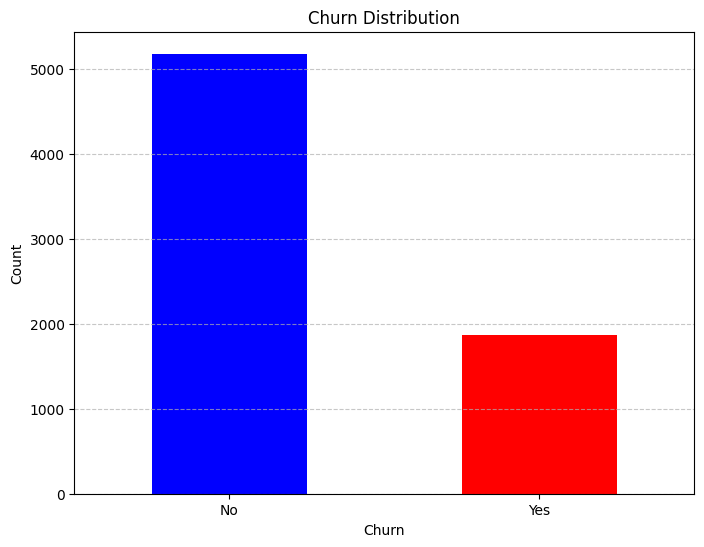

time: 335 ms (started: 2024-10-01 08:16:43 +00:00)


In [ ]:
# Count churned and not churned customers
churn_counts = df['Churn'].value_counts()
print(churn_counts)
# Create a bar chart
plt.figure(figsize=(8, 6))  # Set the figure size
churn_counts.plot(kind='bar', color=['blue', 'red'])  # Set colors for churned and not churned
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a grid for better visualization

# Display the chart
plt.show()

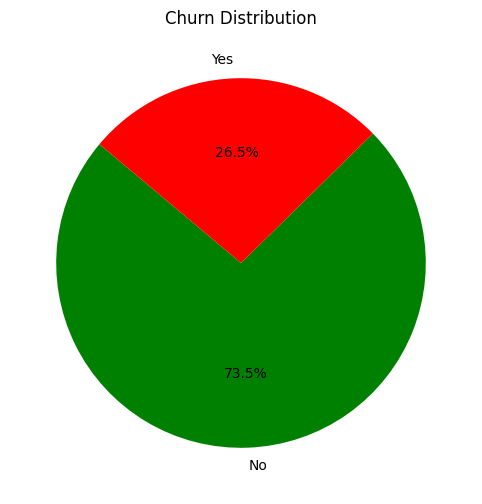

time: 207 ms (started: 2024-10-01 08:16:43 +00:00)


In [ ]:
# Create a pie chart with a modified color palette
plt.figure(figsize=(8, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct="%1.1f%%", startangle=140, colors=['green', 'red'])  # Changed 'blue' to 'green'

# Add a title
plt.title('Churn Distribution')

# Display the chart
plt.show()

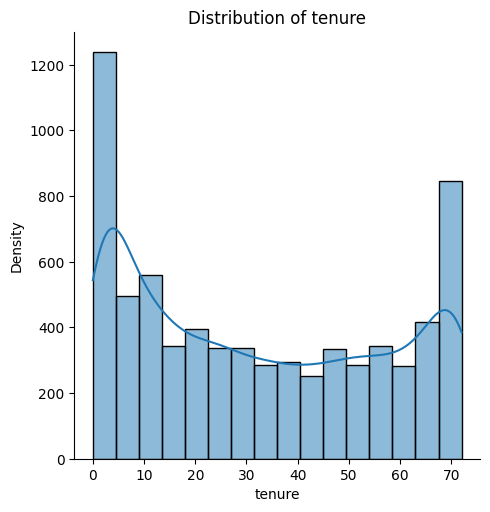

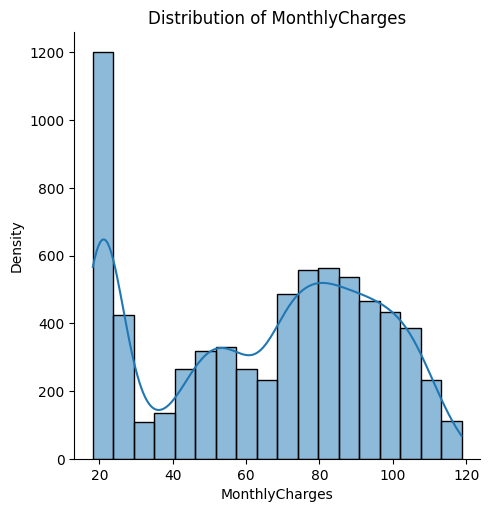

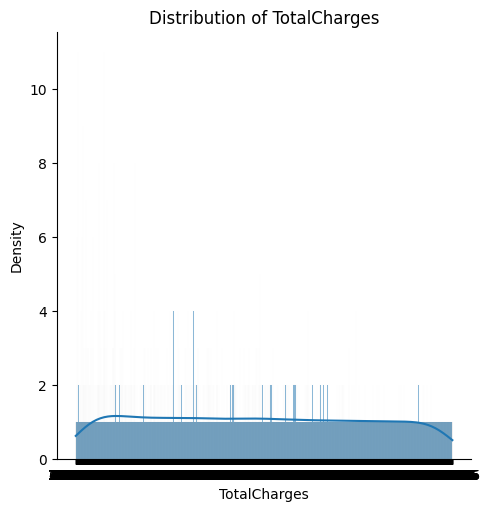

time: 1min 36s (started: 2024-10-01 08:16:43 +00:00)


In [ ]:
# Create a distribution plot for each numerical feature
for feature in numerical_features:
    sns.displot(df[feature], kde=True)  # kde=True for kernel density estimation
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

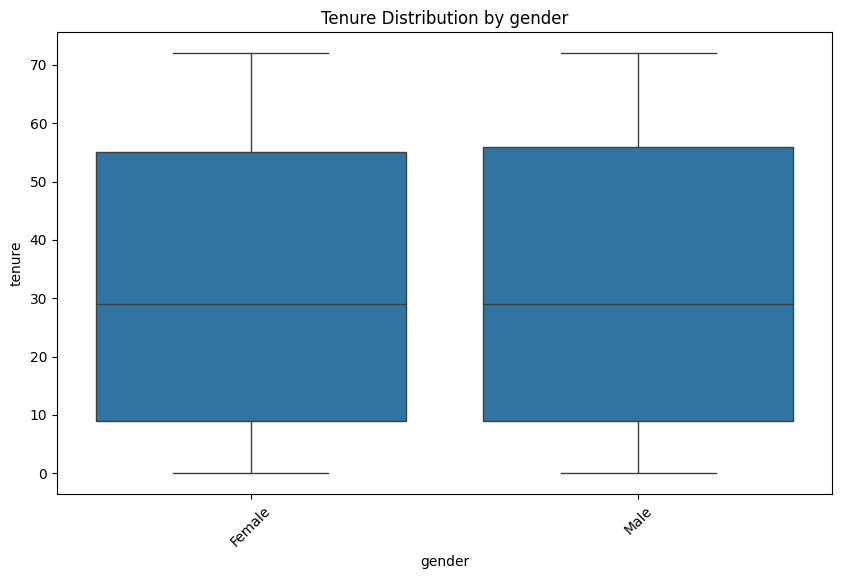

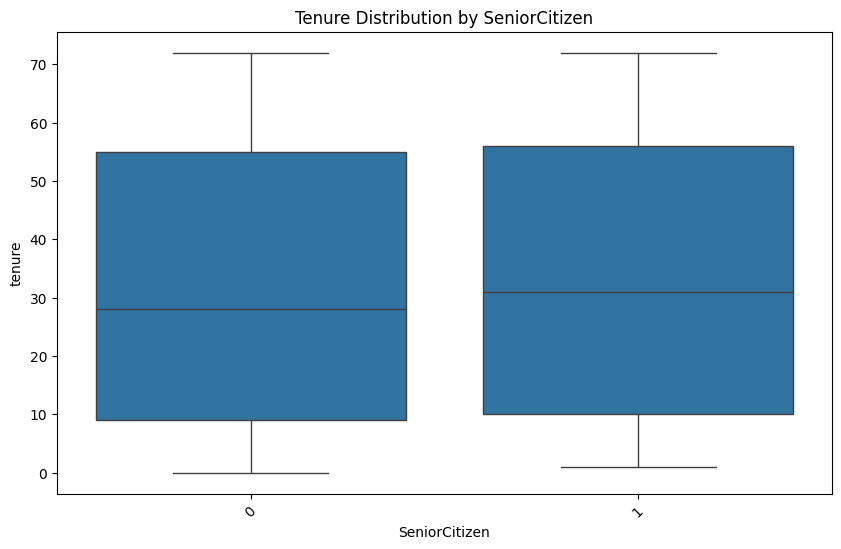

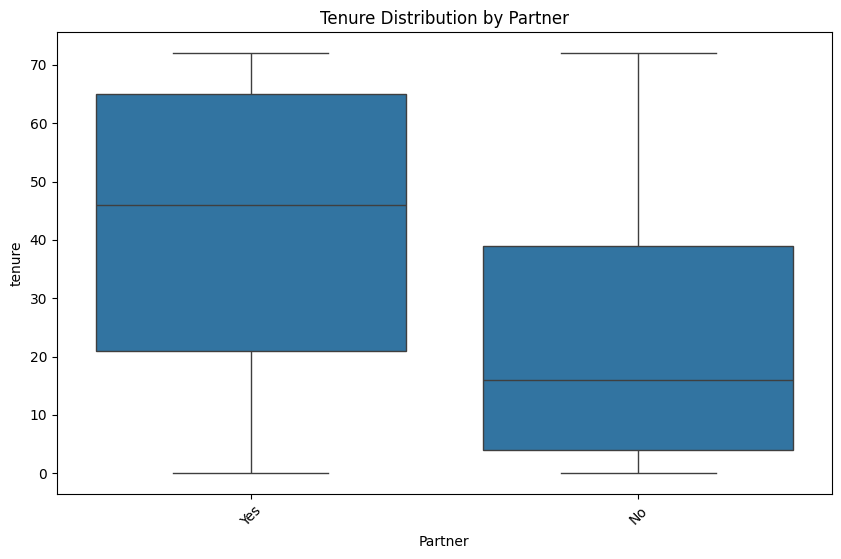

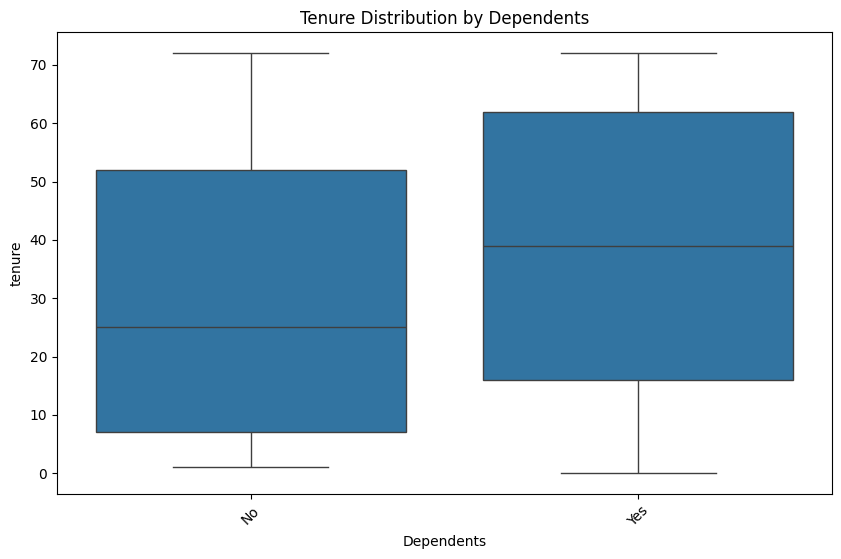

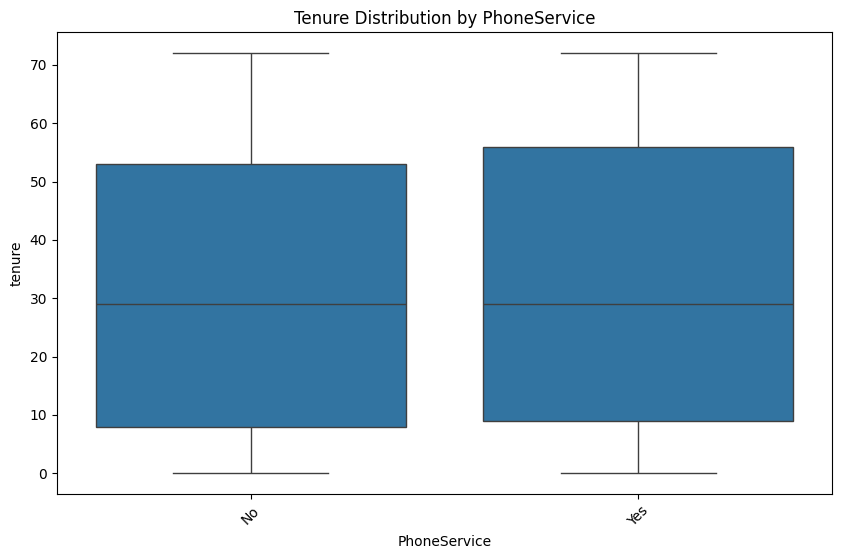

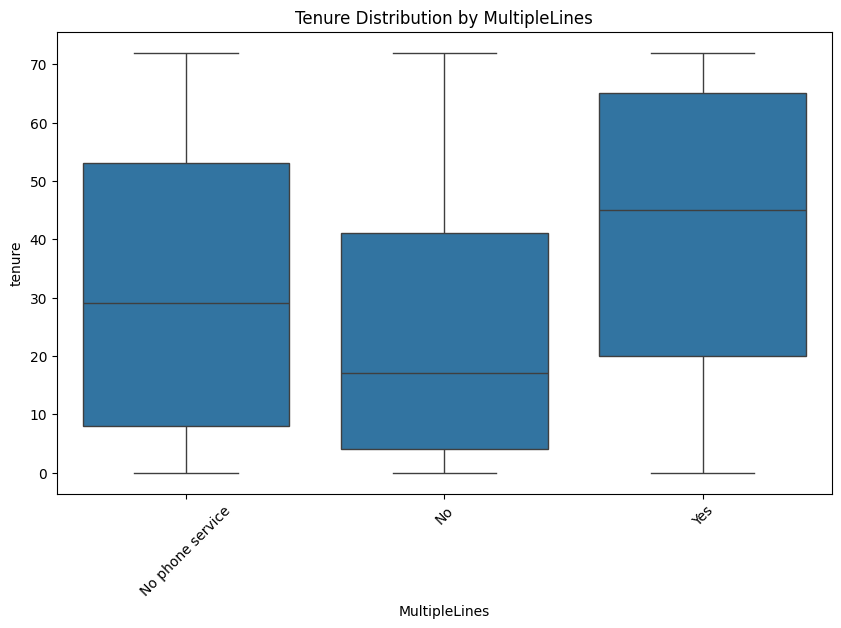

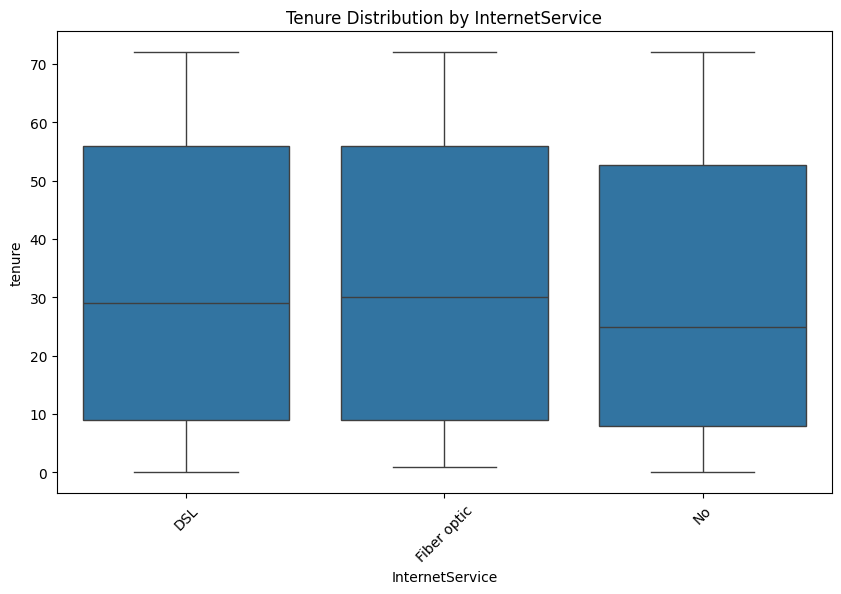

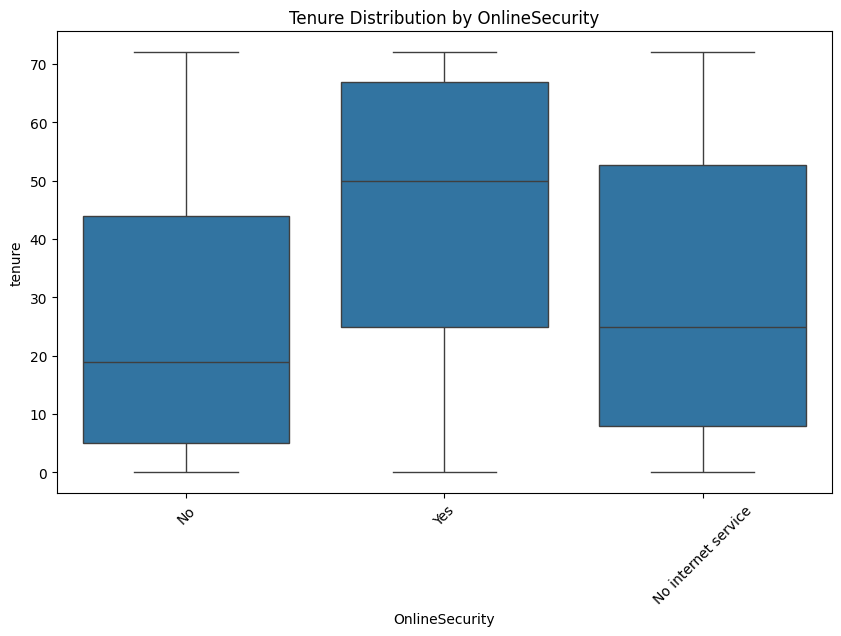

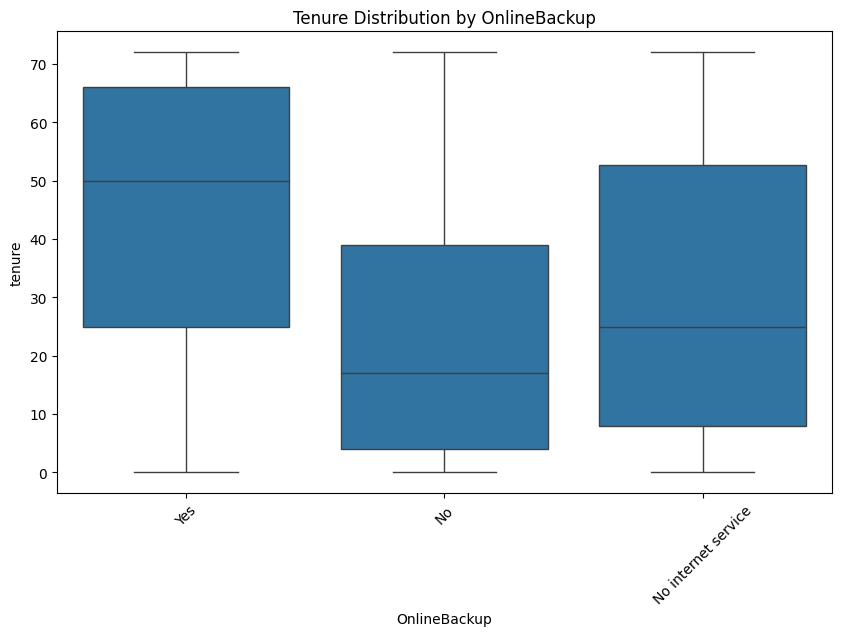

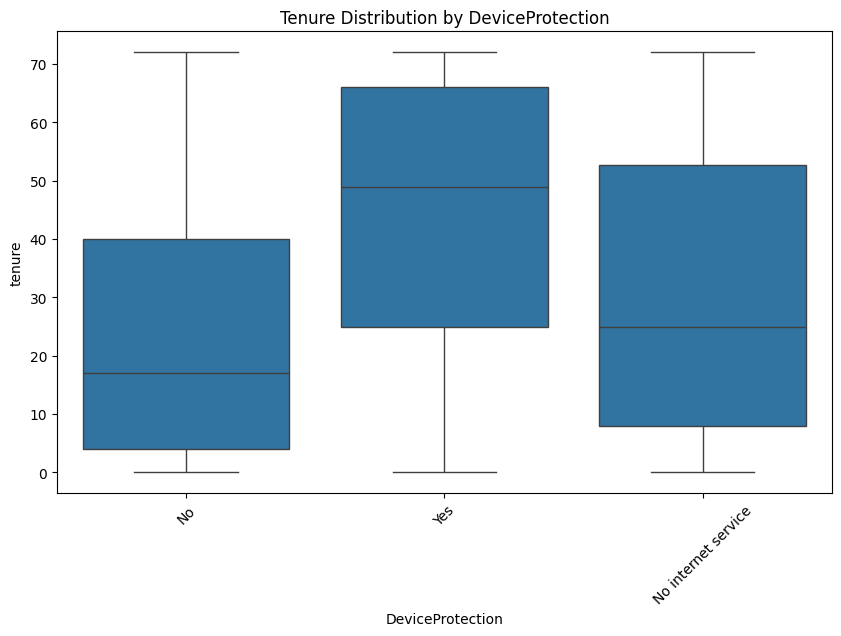

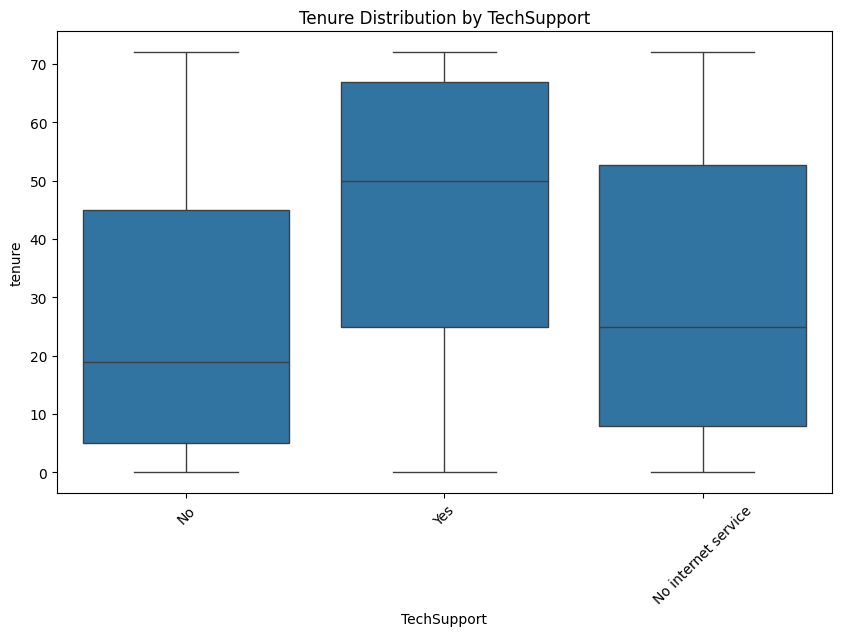

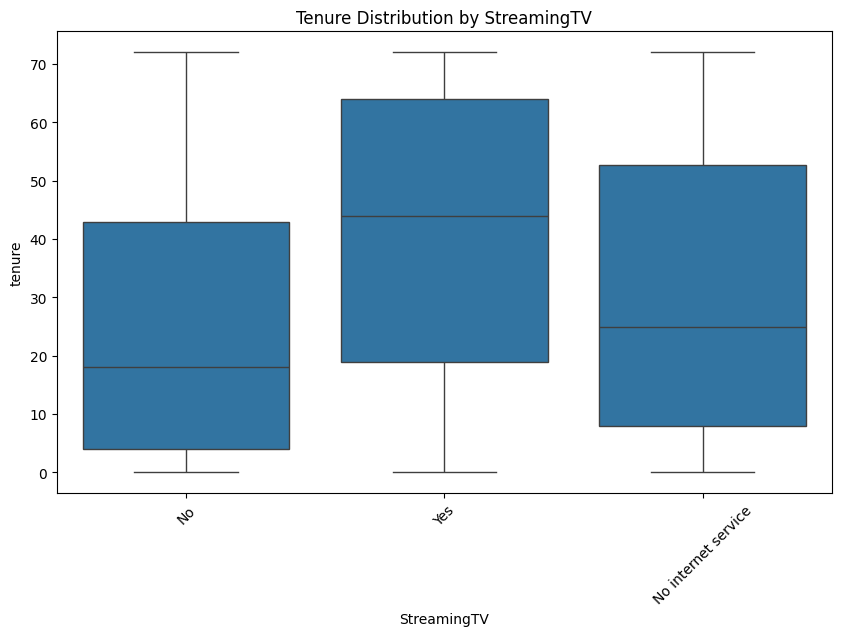

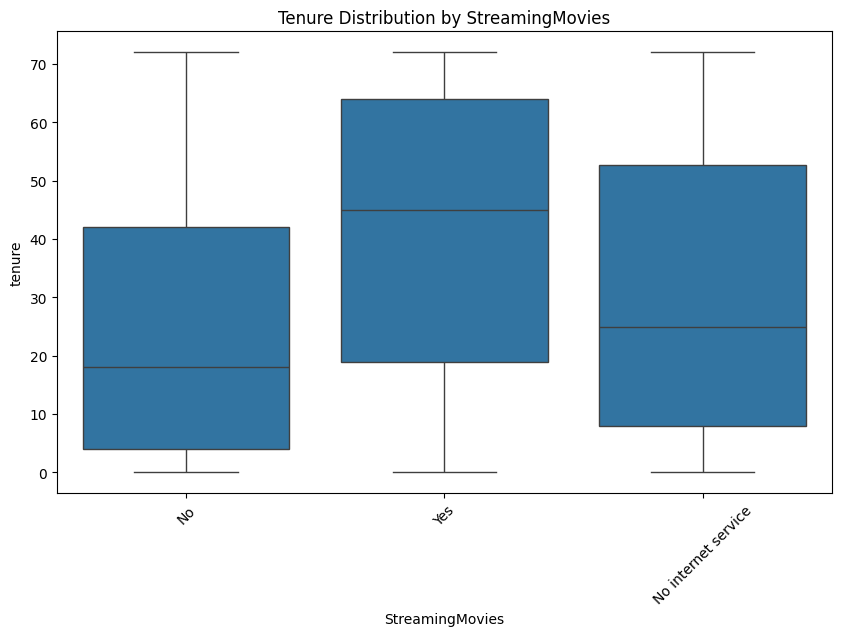

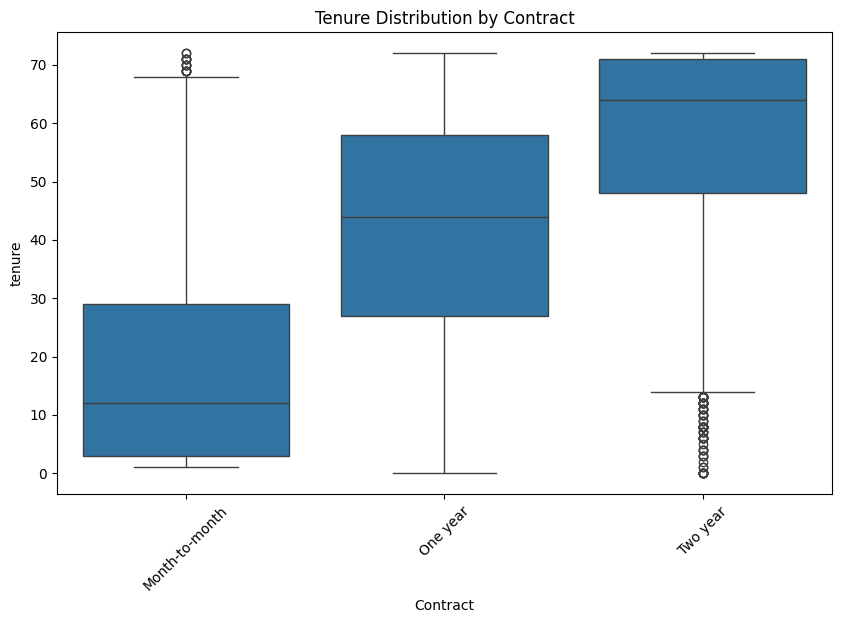

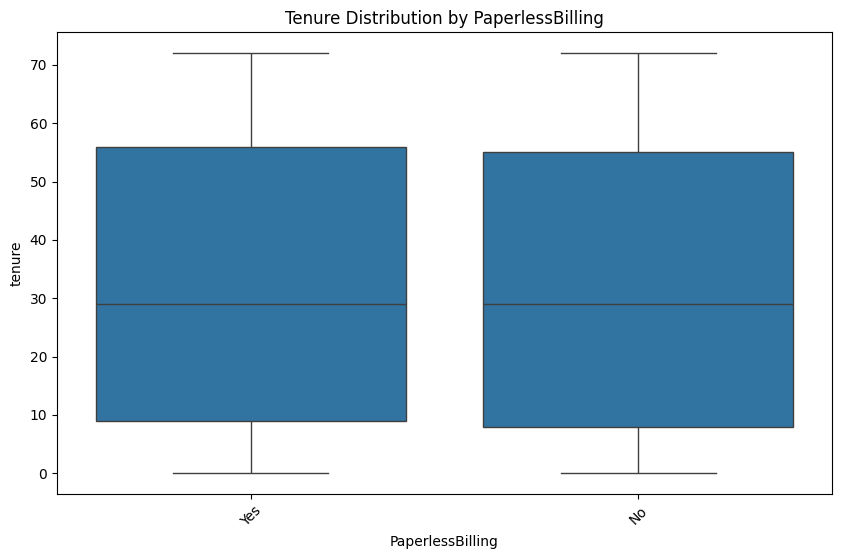

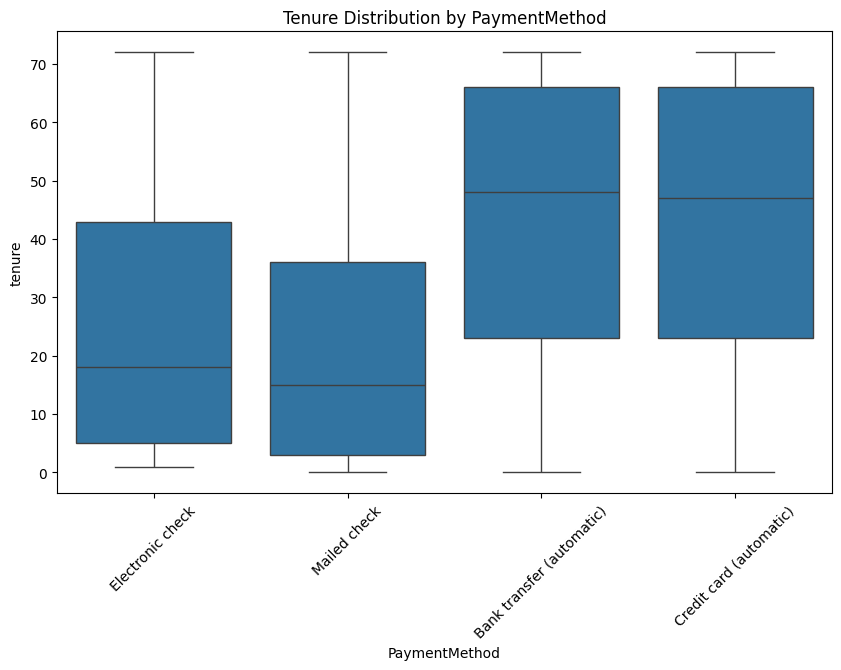

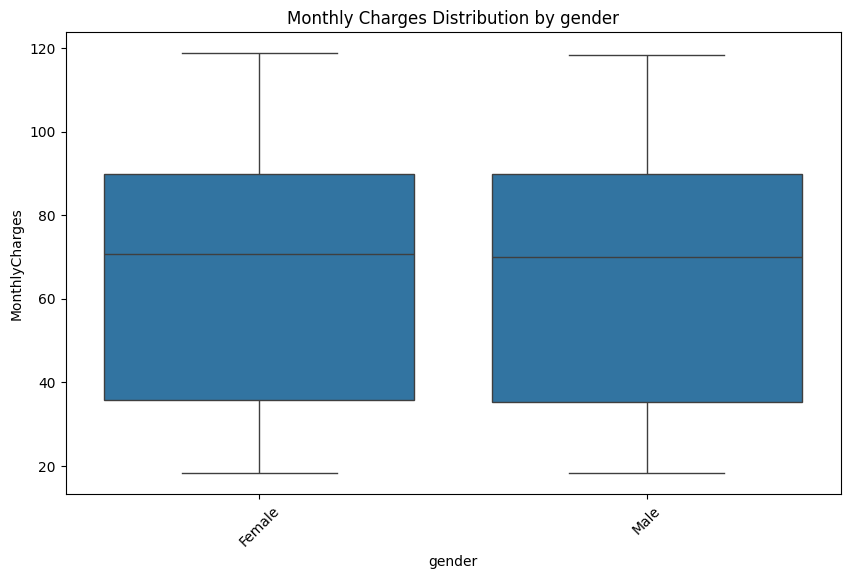

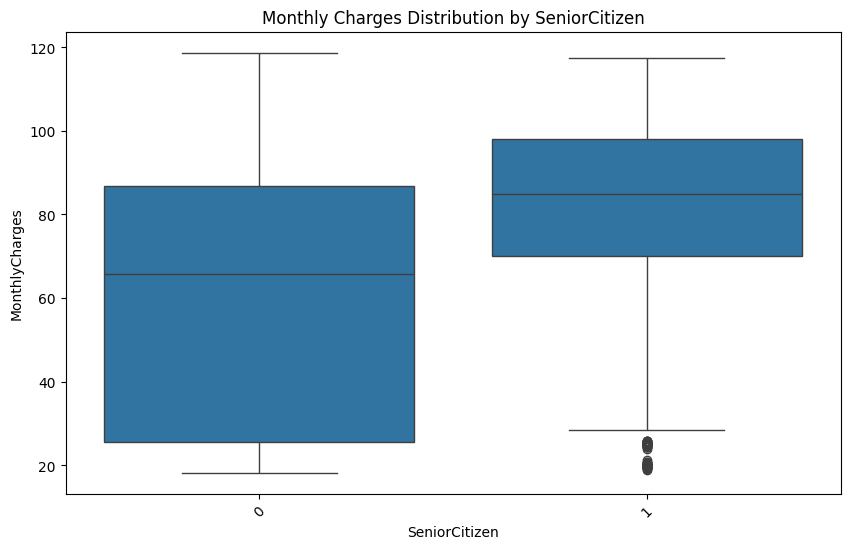

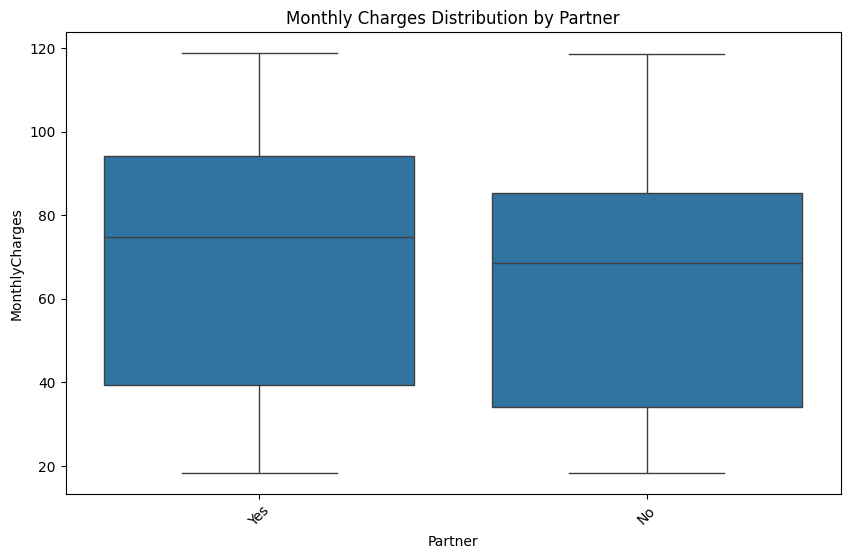

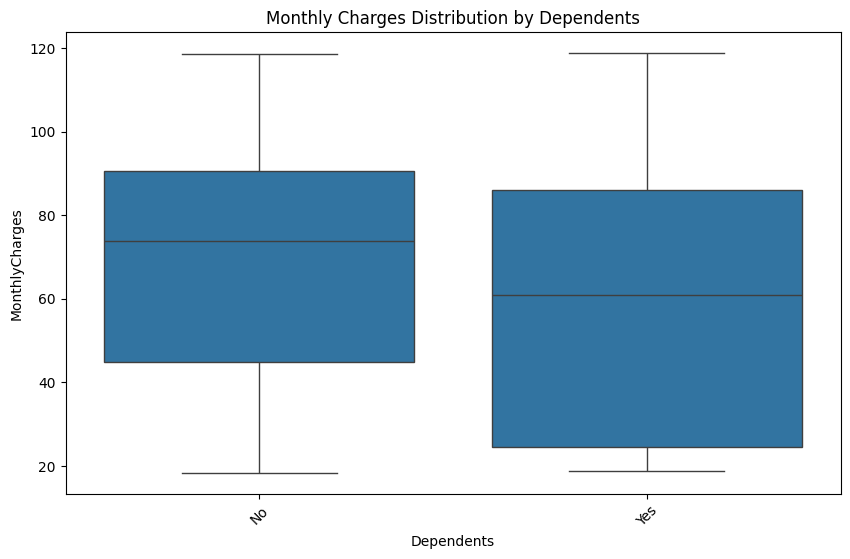

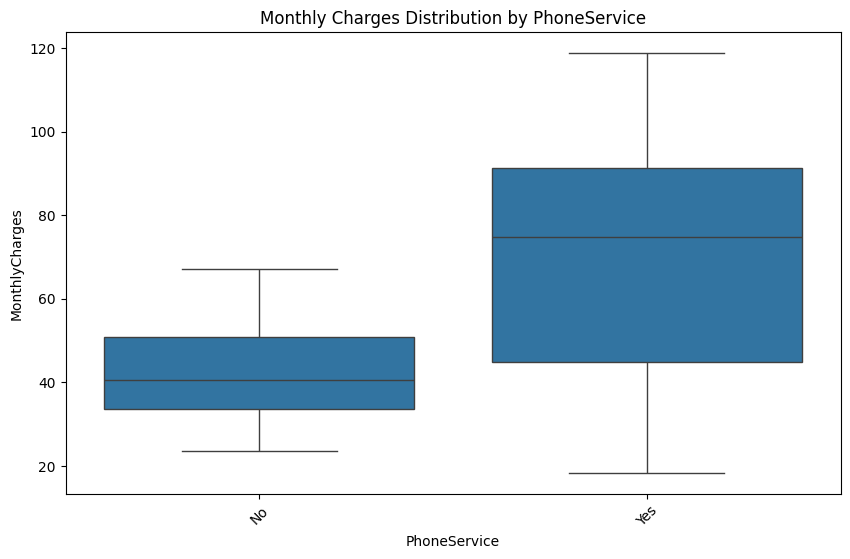

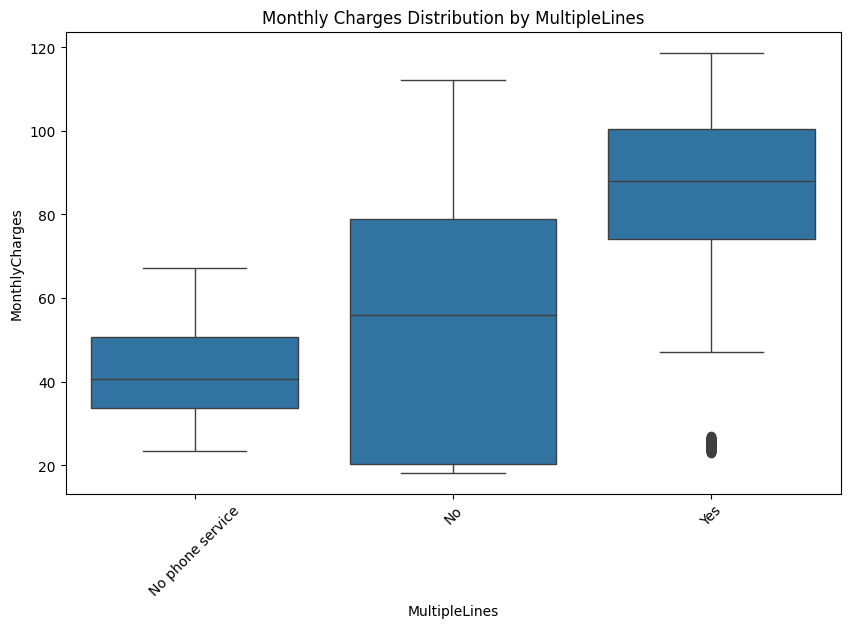

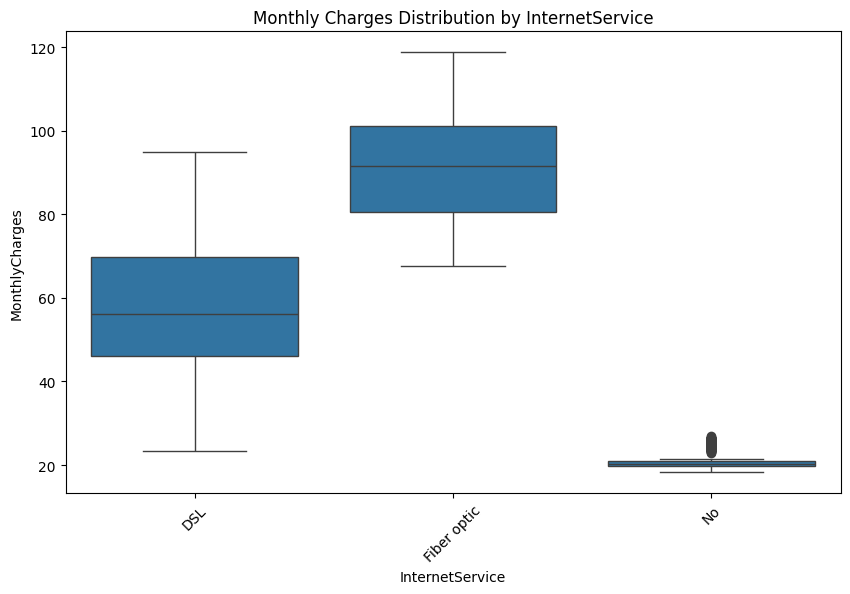

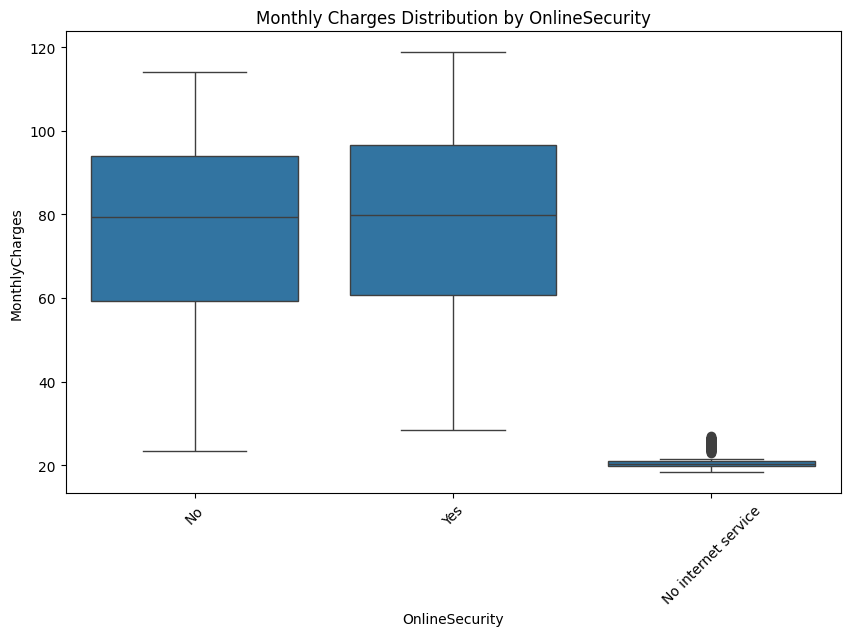

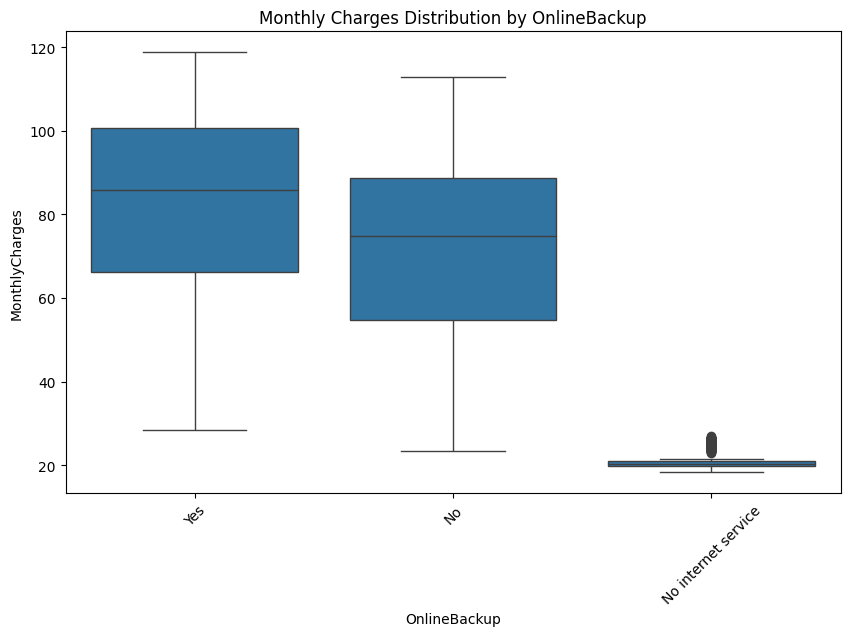

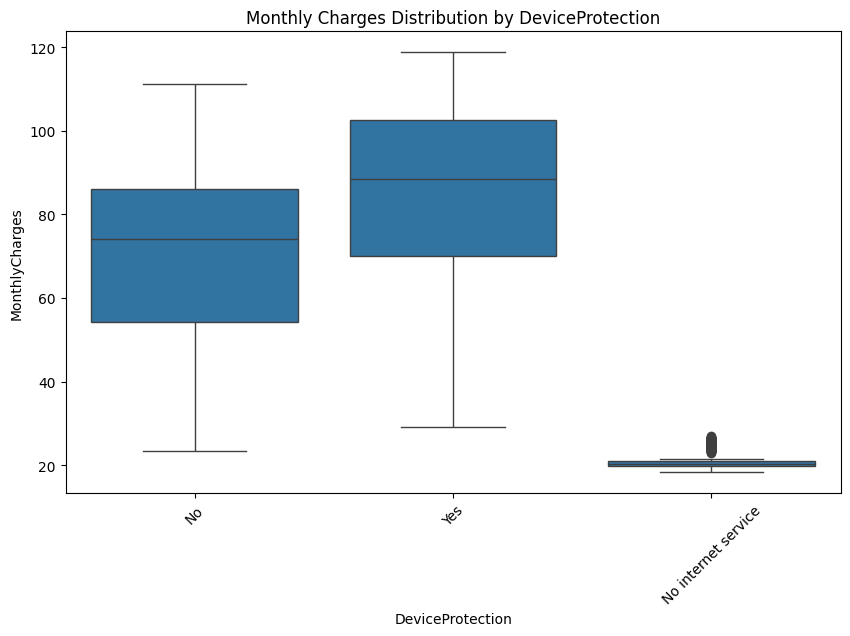

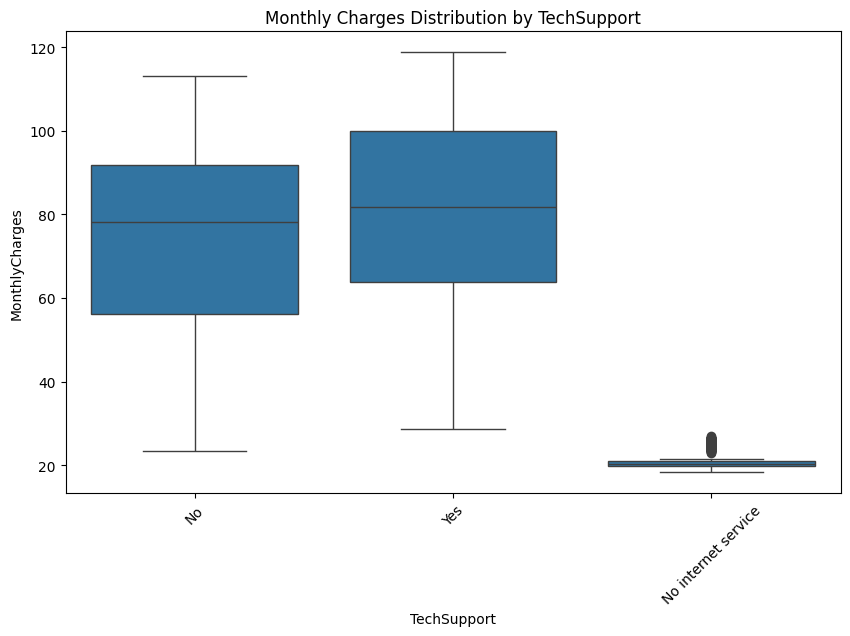

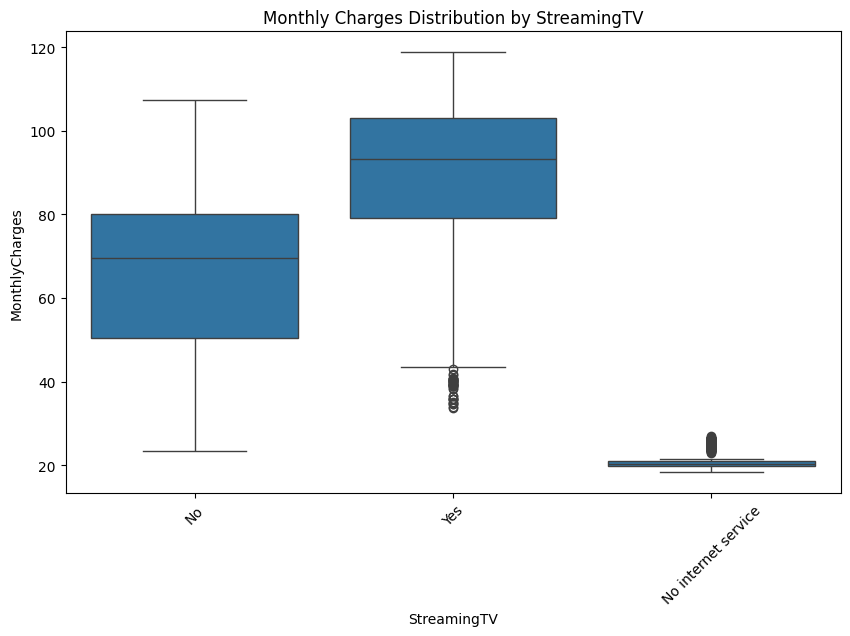

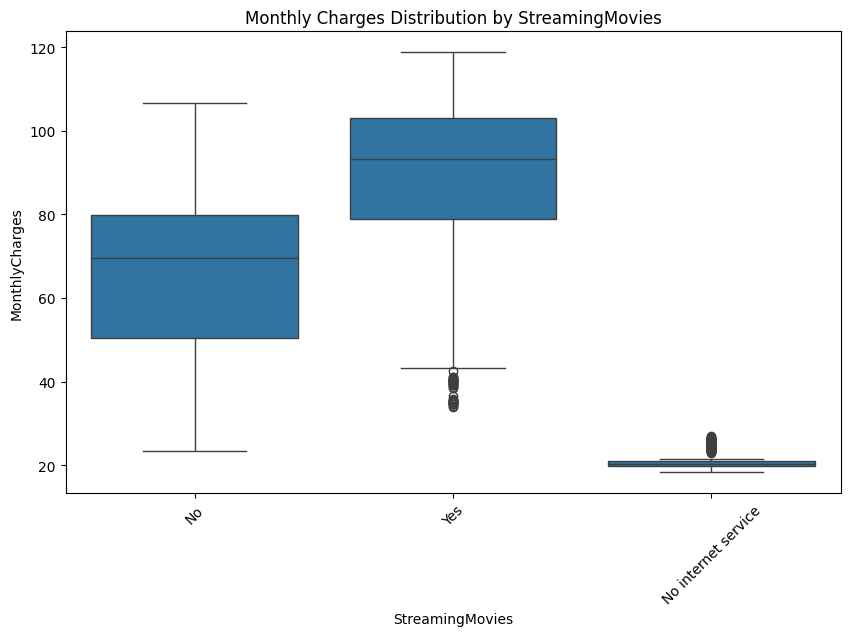

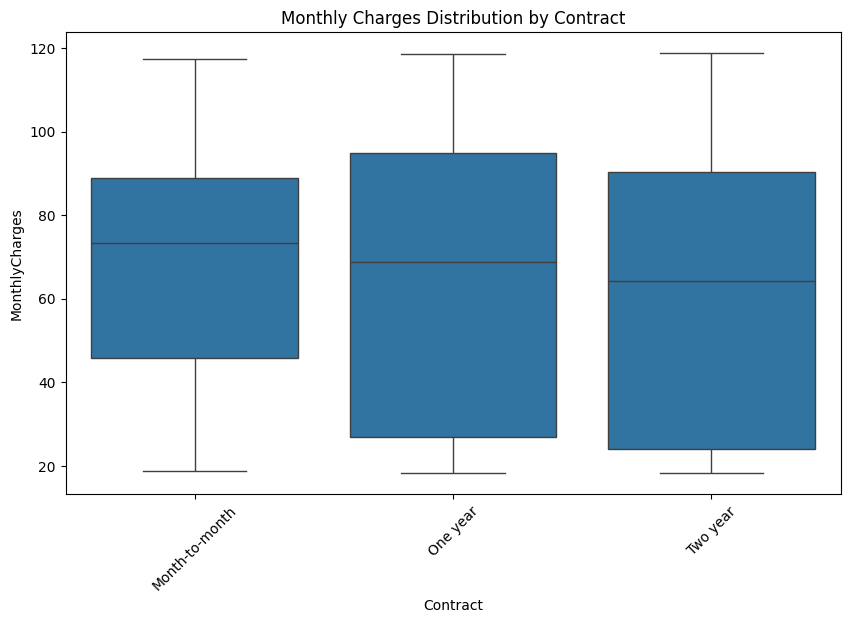

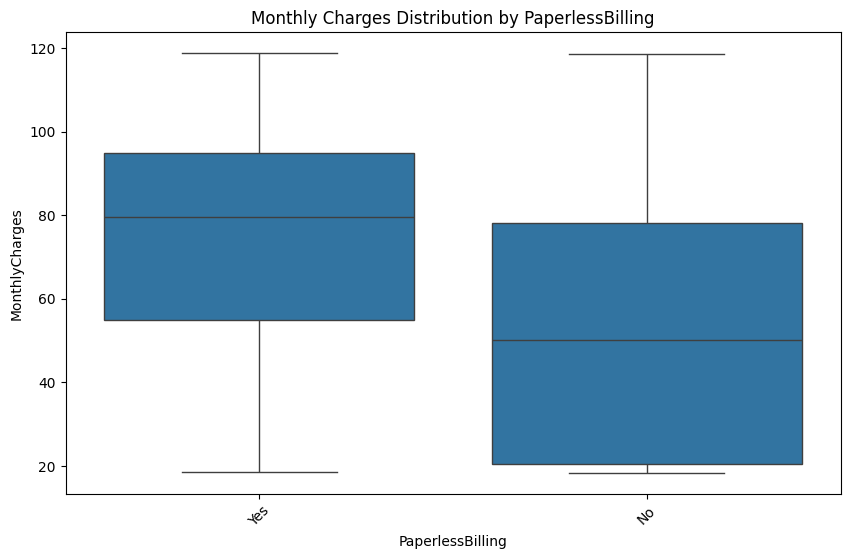

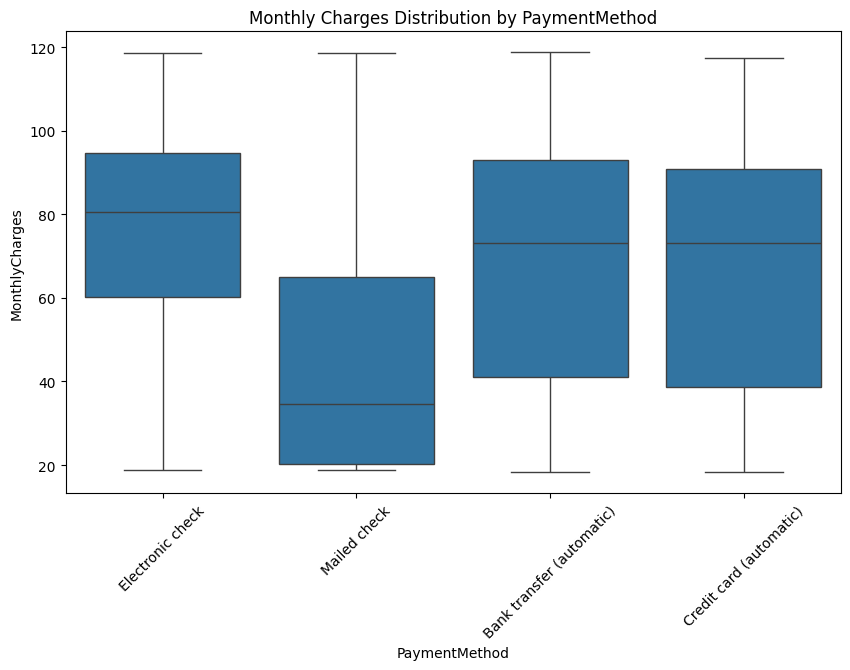

time: 10.2 s (started: 2024-10-01 08:18:20 +00:00)


In [ ]:
#Finding the reason for bimodality in tenure and monthlycharges
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical columns to analyze
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                       'Contract', 'PaperlessBilling', 'PaymentMethod']

# 1. Tenure Analysis

# Loop through categorical columns and create box plots for tenure
for column in categorical_columns:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.boxplot(x=column, y='tenure', data=df)
    plt.title(f'Tenure Distribution by {column}')
    plt.xticks(rotation=45)  # Rotate x-axis labels if they overlap
    plt.show()

# 2. MonthlyCharges Analysis

# Loop through categorical columns and create box plots for MonthlyCharges
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column, y='MonthlyCharges', data=df)
    plt.title(f'Monthly Charges Distribution by {column}')
    plt.xticks(rotation=45)
    plt.show()

**Tenure Bimodality**

Contract Type: The box plot "Tenure Distribution by Contract" reveals a clear distinction. Customers with Month-to-Month contracts have significantly lower tenures compared to those with One year or Two year contracts. This suggests that the contract type is a major contributor to the bimodal distribution of tenure, with short-term contracts leading to one peak of lower tenures and longer-term contracts leading to another peak of higher tenures.

Other Factors: While Contract Type seems to be the primary driver, other factors might also play a subtle role. For instance, there are slight differences in tenure distributions across categories like InternetService, OnlineSecurity, and TechSupport. However, these differences are less pronounced compared to the impact of Contract.

**MonthlyCharges Bimodality**

Internet Service: The box plot "Monthly Charges Distribution by InternetService" shows a clear separation. Customers with Fiber optic internet service have notably higher monthly charges compared to those with DSL or No internet service. This indicates that the type of internet service is a key factor contributing to the bimodality in MonthlyCharges, with Fiber optic leading to a peak at higher charges and DSL/No internet service leading to a peak at lower charges.

Additional Services: Other services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies also seem to influence MonthlyCharges. Customers who subscribe to these services tend to have higher monthly charges, contributing to the rightward skew and potentially influencing the second peak.

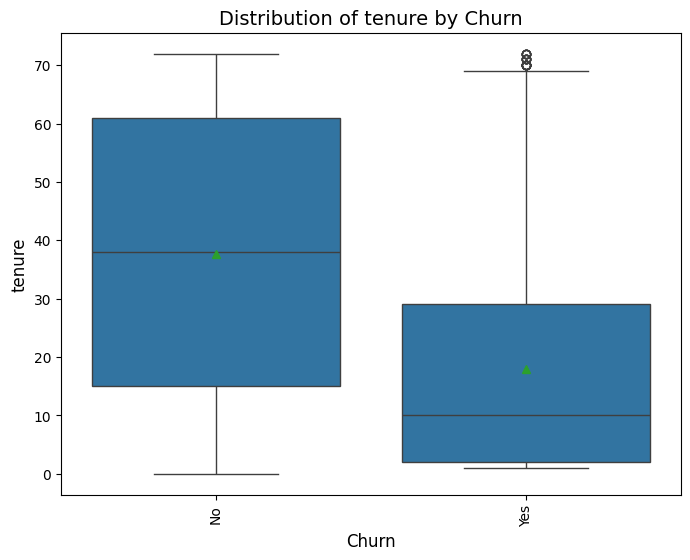

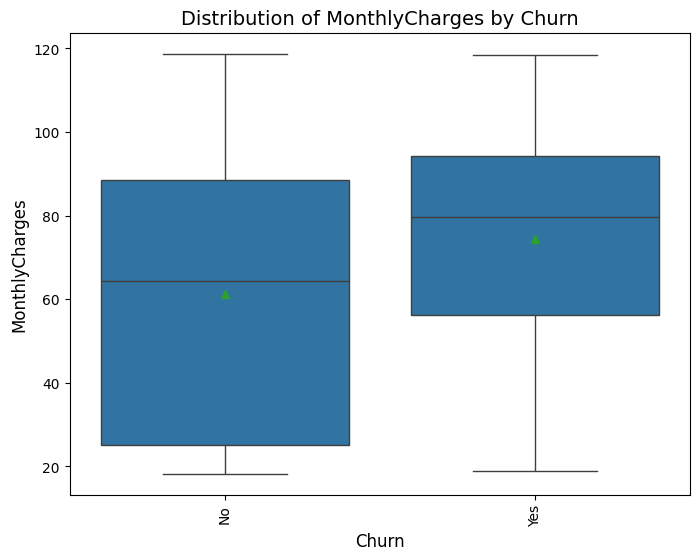

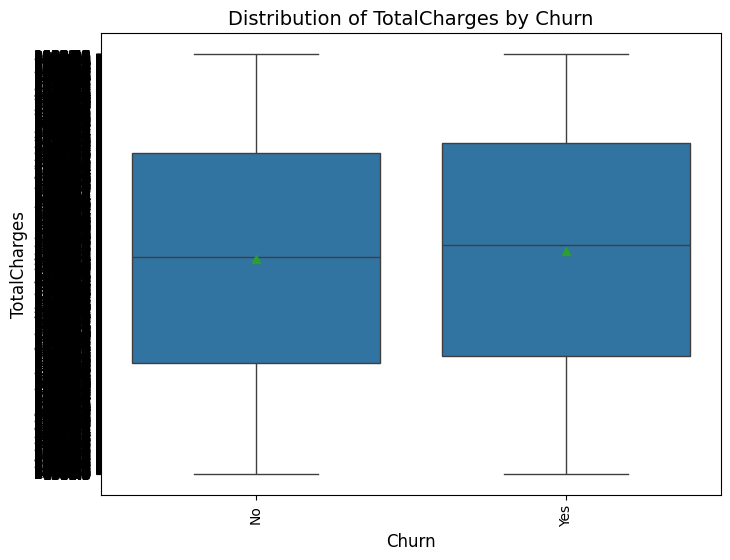

time: 1min 15s (started: 2024-10-01 08:18:30 +00:00)


In [ ]:
# Box plots for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Churn", y=feature, showmeans=True, data=df)
    plt.title(f'Distribution of {feature} by Churn', fontsize=14)
    plt.xlabel('Churn', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(rotation=90, fontsize=10)  # Rotate x-axis labels by 90 degrees
    plt.show()

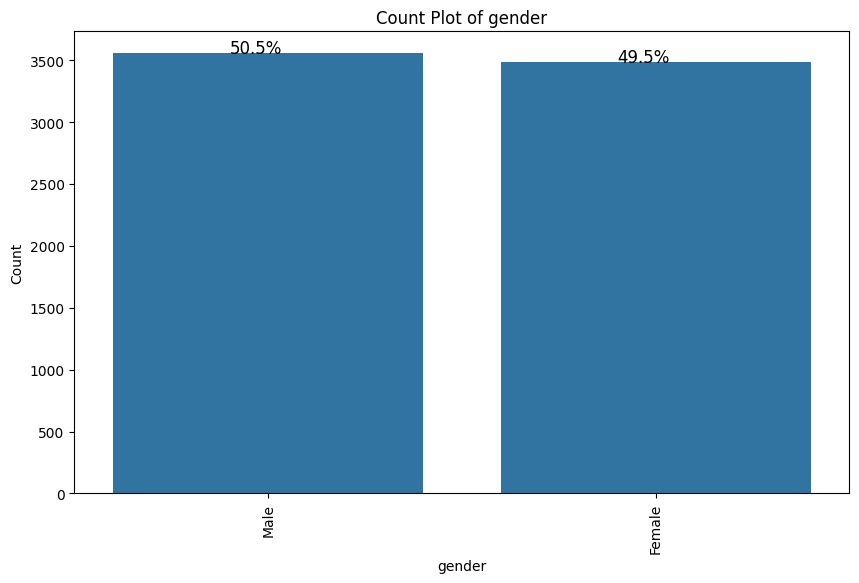

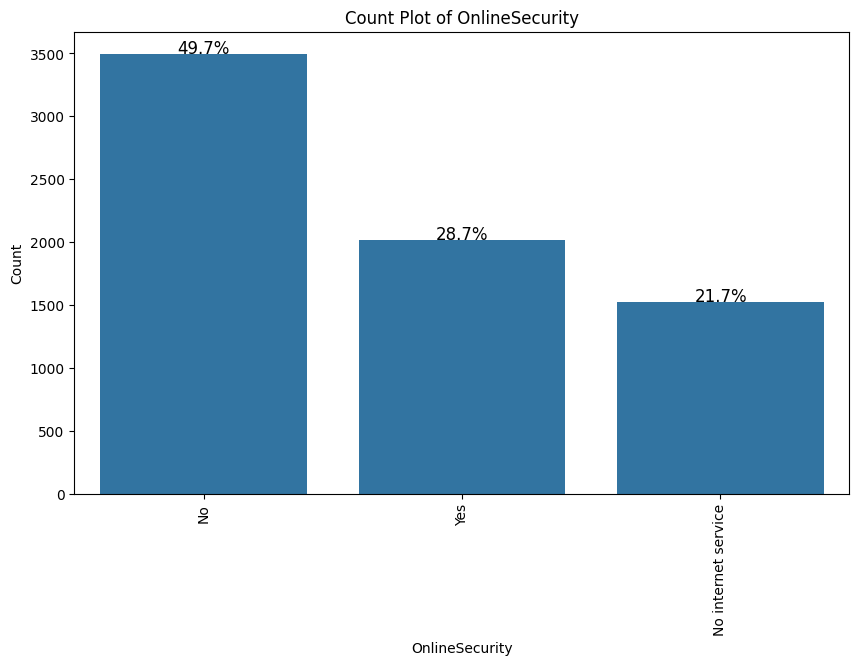

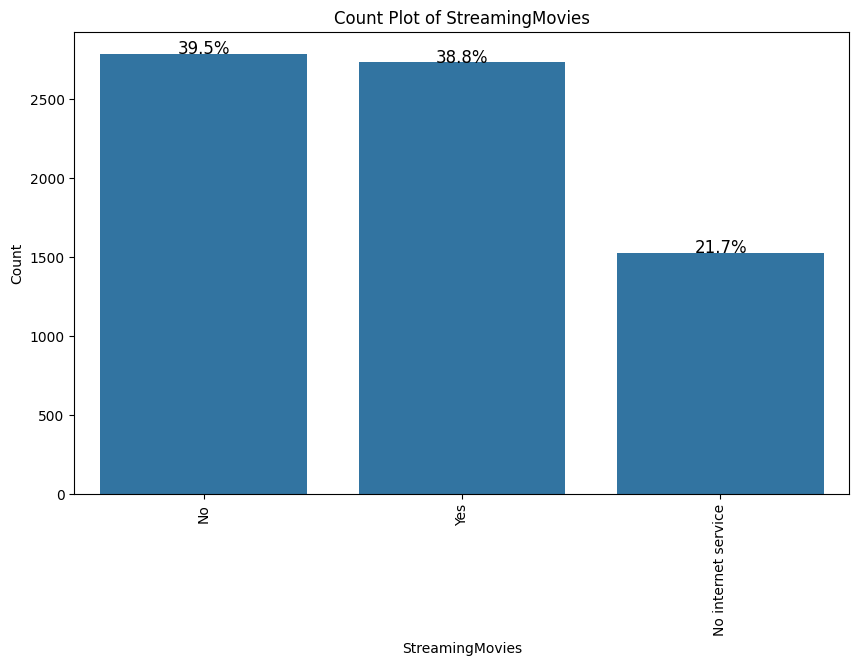

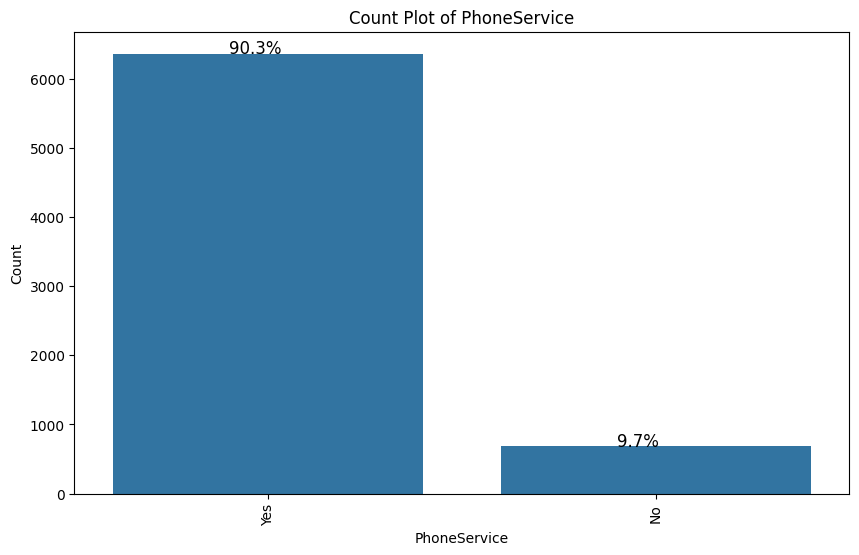

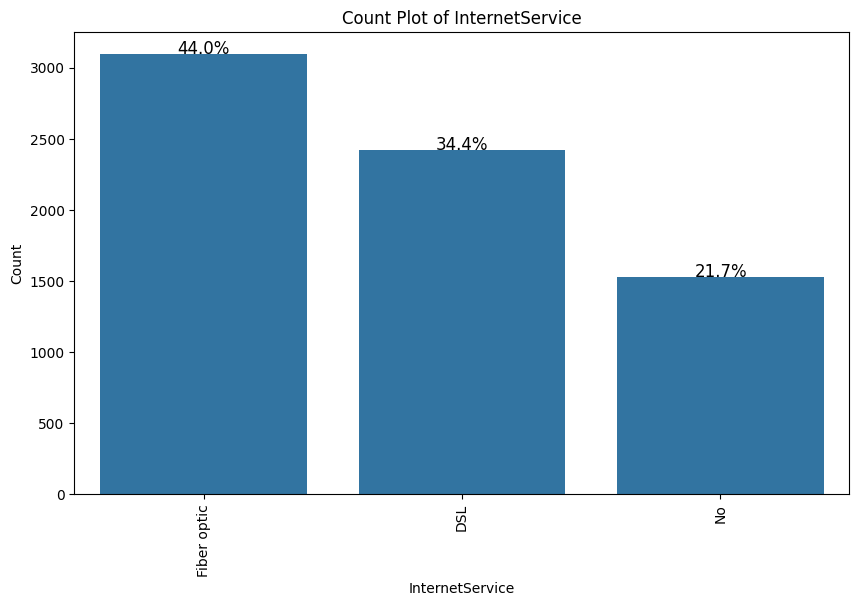

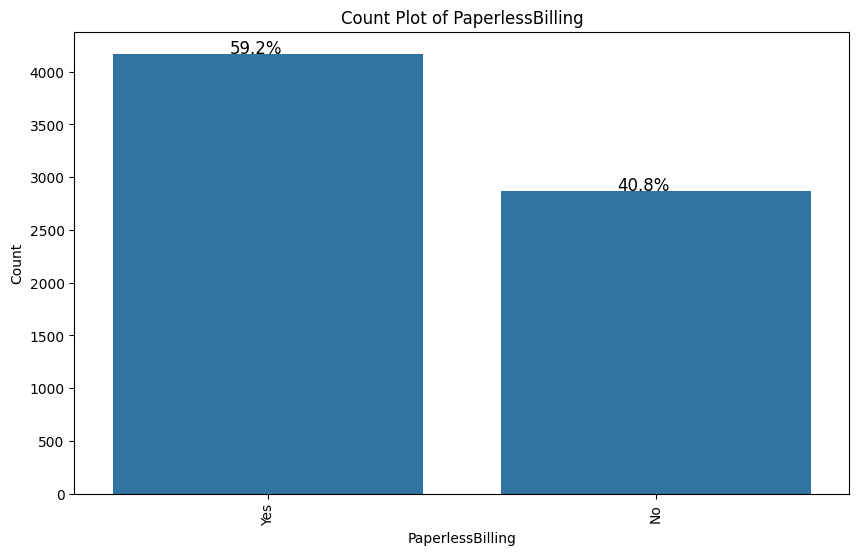

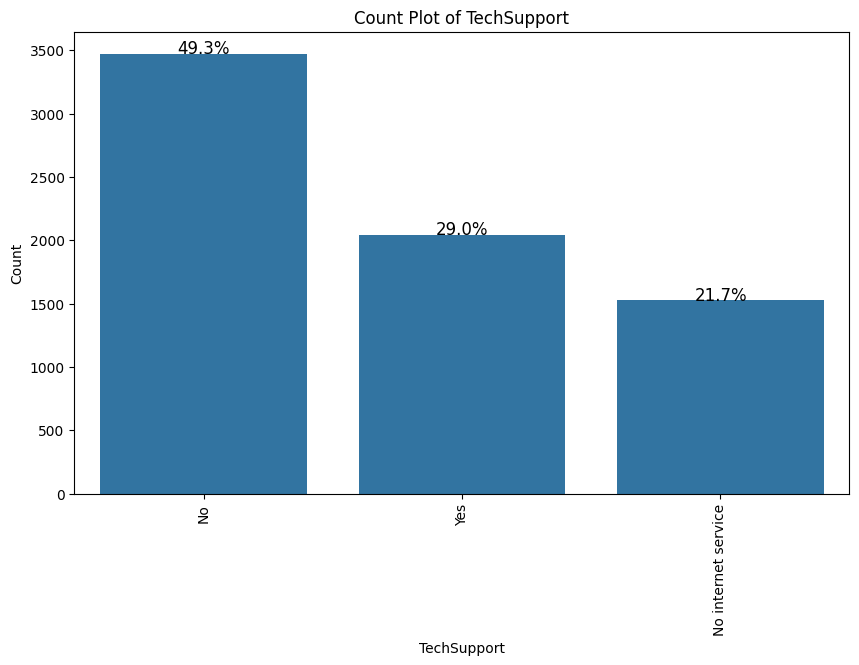

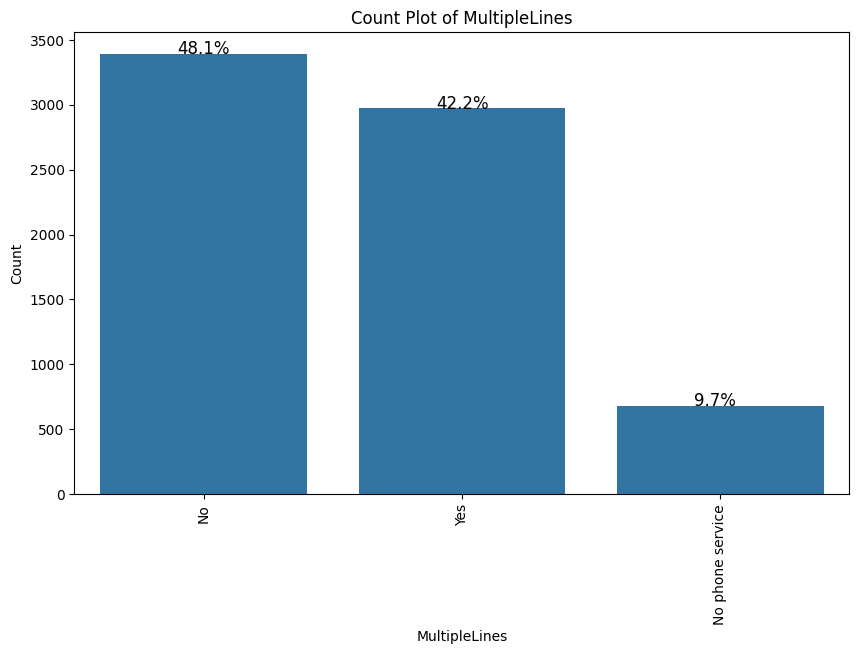

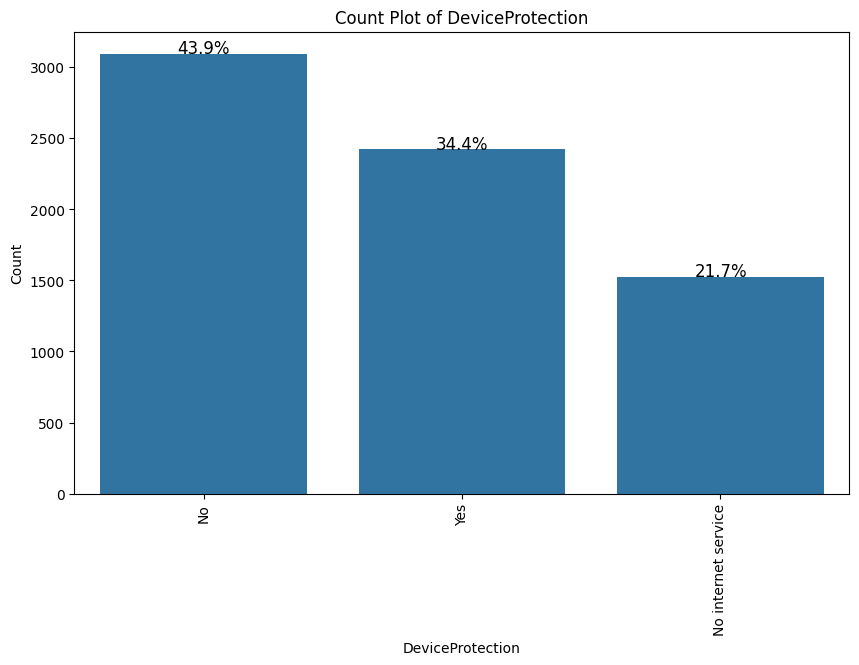

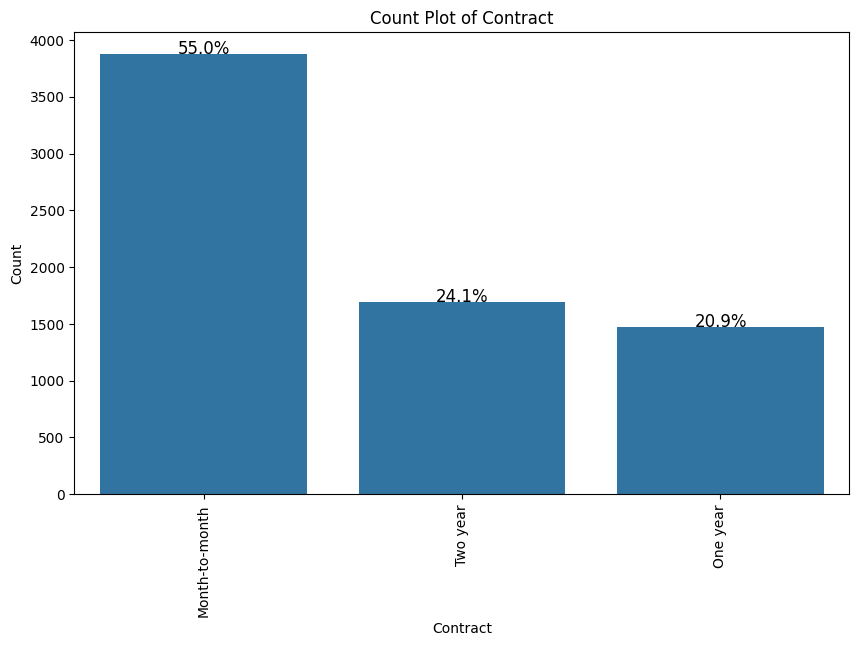

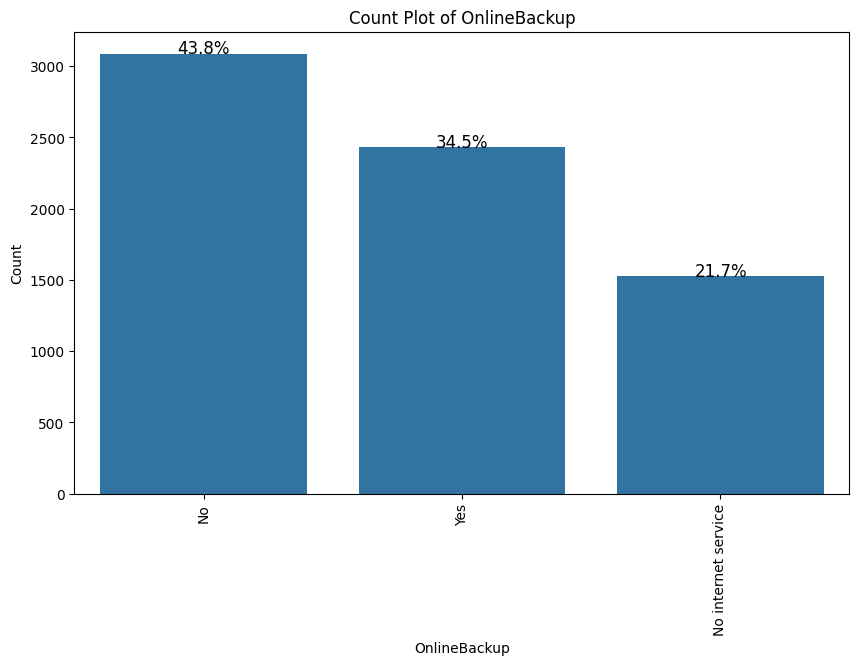

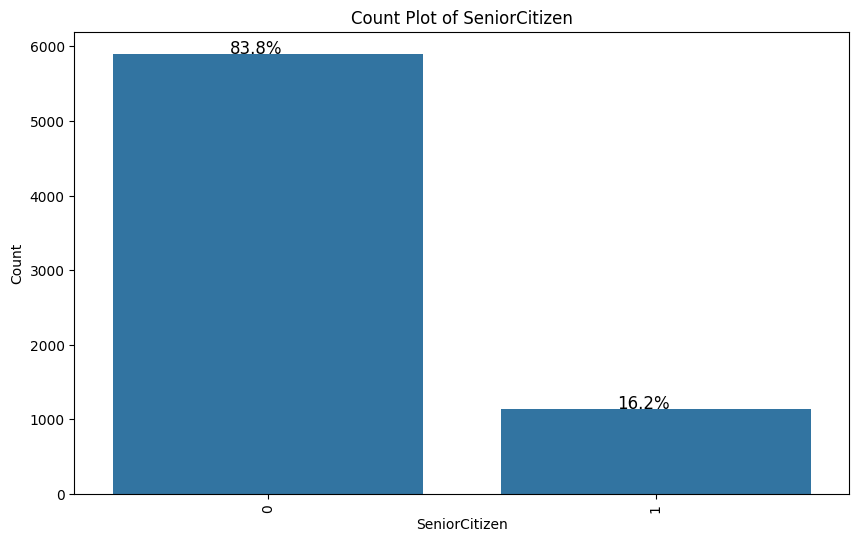

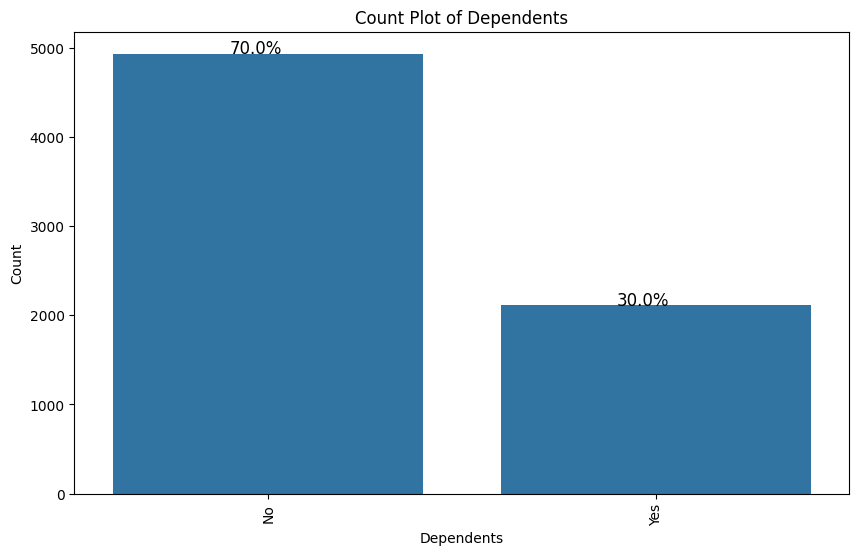

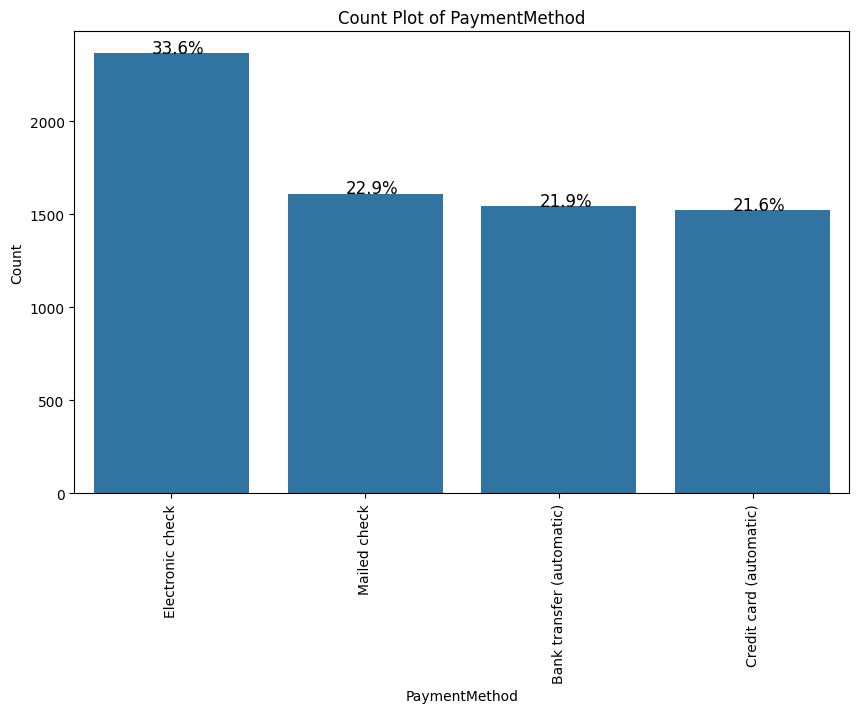

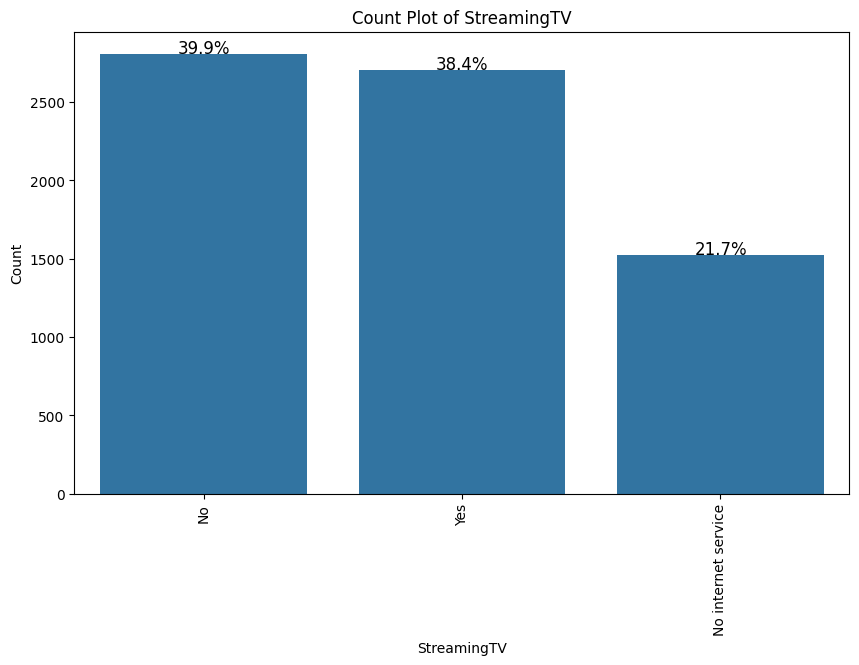

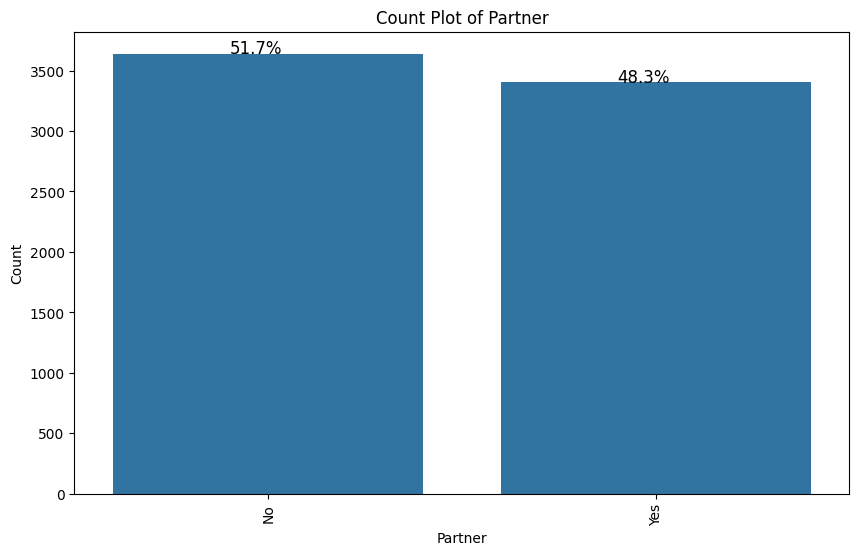

time: 5.11 s (started: 2024-10-01 08:19:46 +00:00)


In [ ]:
excluded_features = ["customerID"]  # Define the features to exclude

# Count plots for single categorical features (excluding specific features)
for feature in categorical_features:
    if feature in df.columns and feature not in excluded_features:  # Check for presence and exclusion
        plt.figure(figsize=(10, 6))

        # Count plot with percentages
        ax = sns.countplot(x=df[feature], order=df[feature].value_counts().index)
        plt.title(f'Count Plot of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')

        # Add percentages as text labels
        total = float(len(df[feature]))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2 - 0.1
            y = p.get_y() + p.get_height() + 0.02
            ax.annotate(percentage, (x, y), size=12)

        # Make x-axis labels vertical
        plt.xticks(rotation=90)

        plt.show()

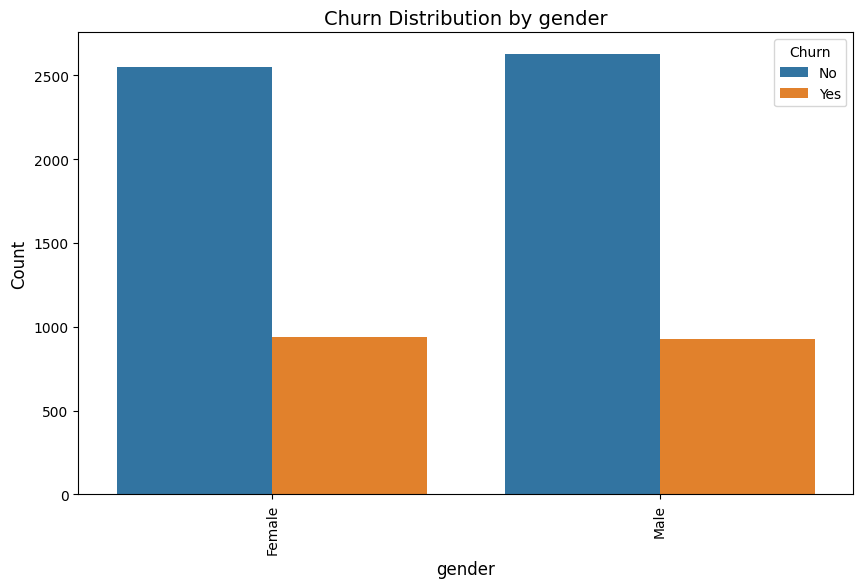

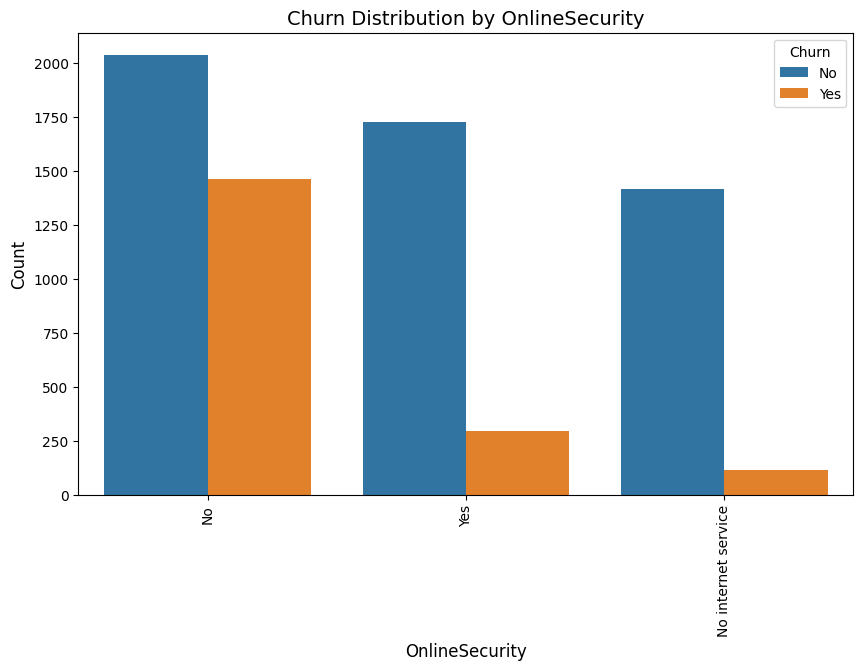

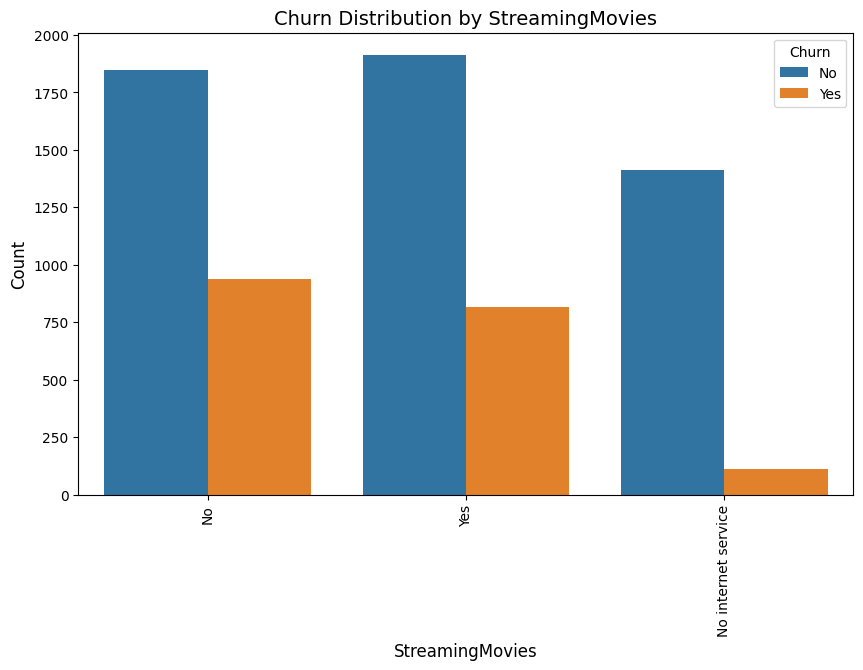

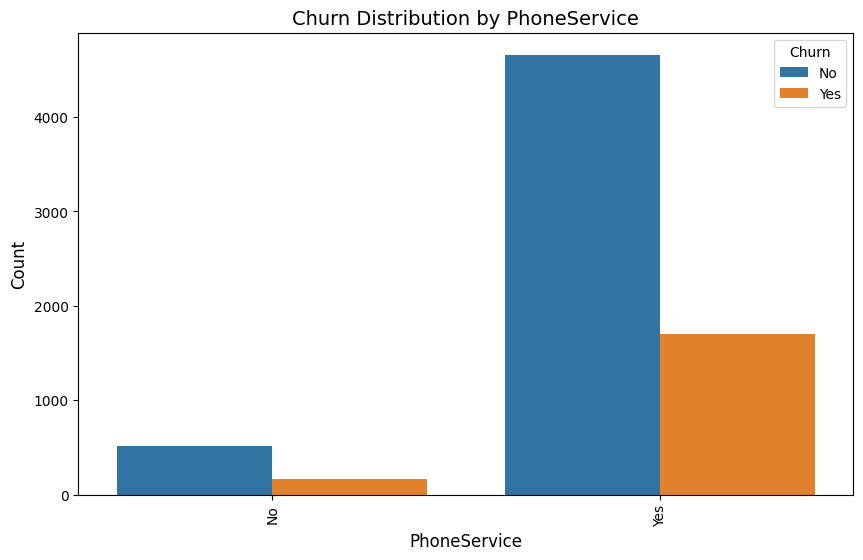

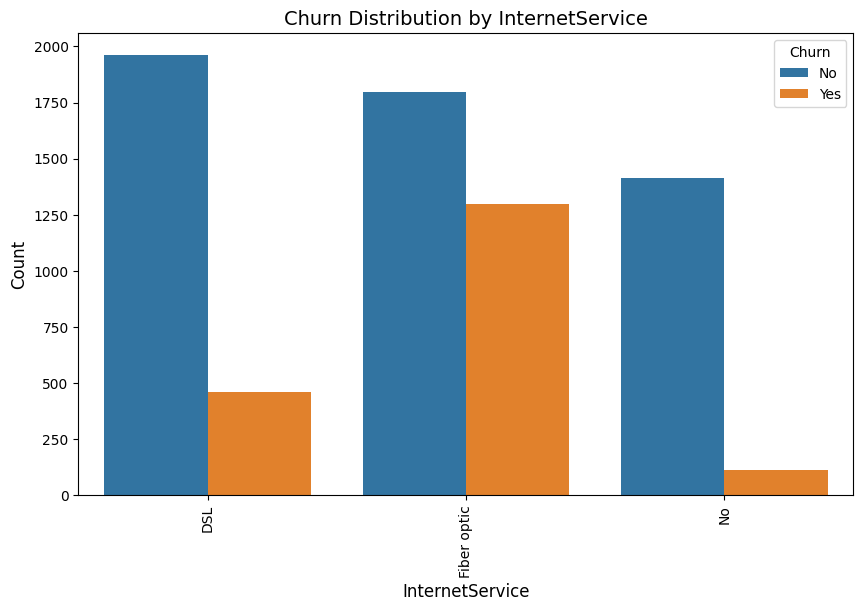

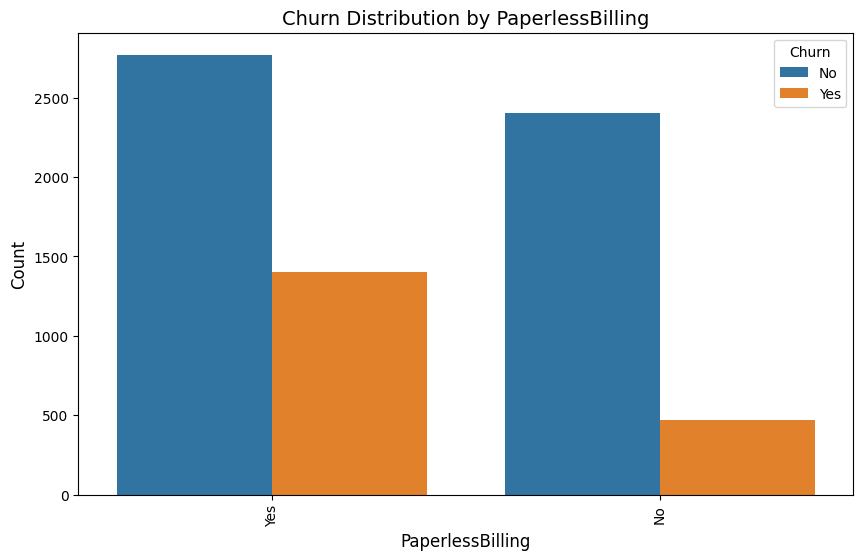

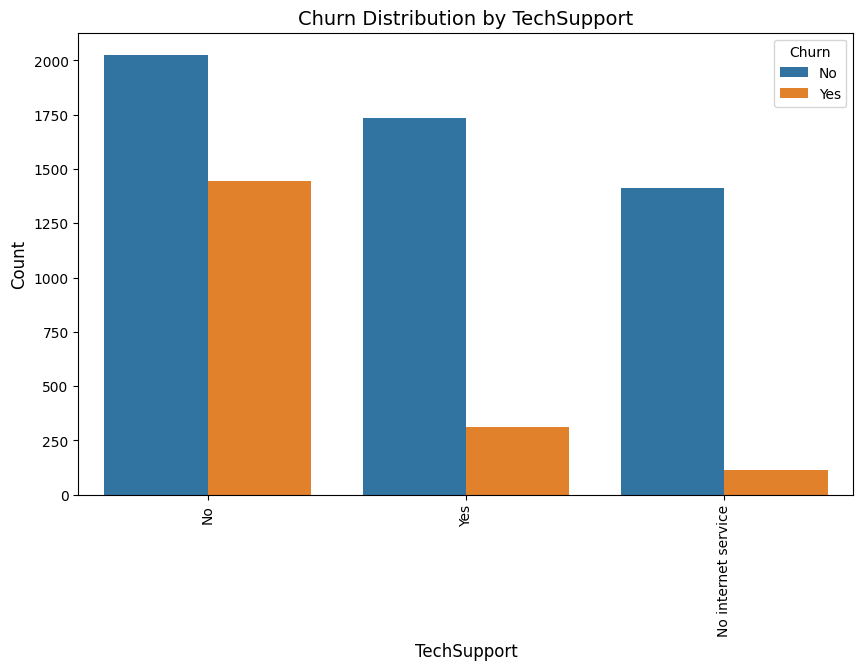

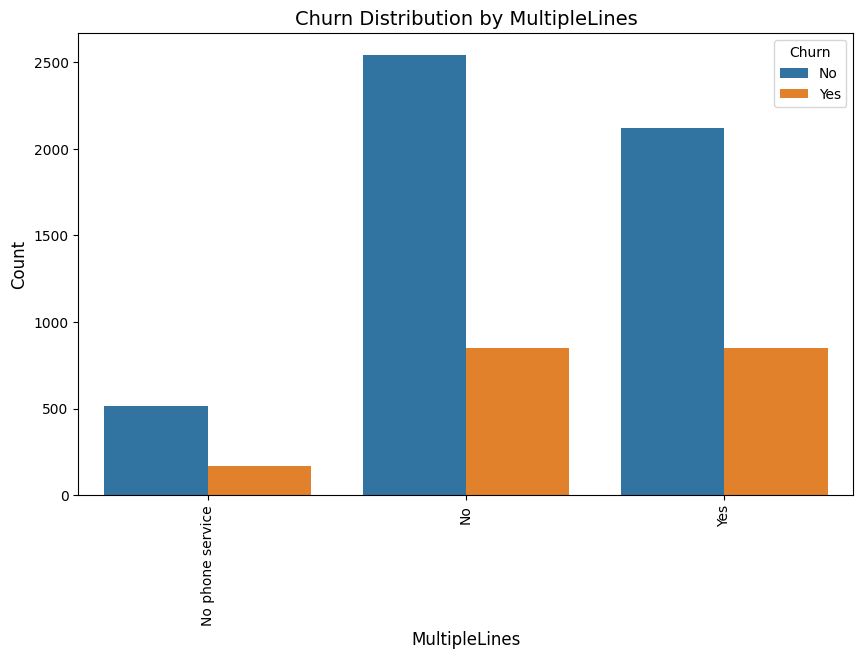

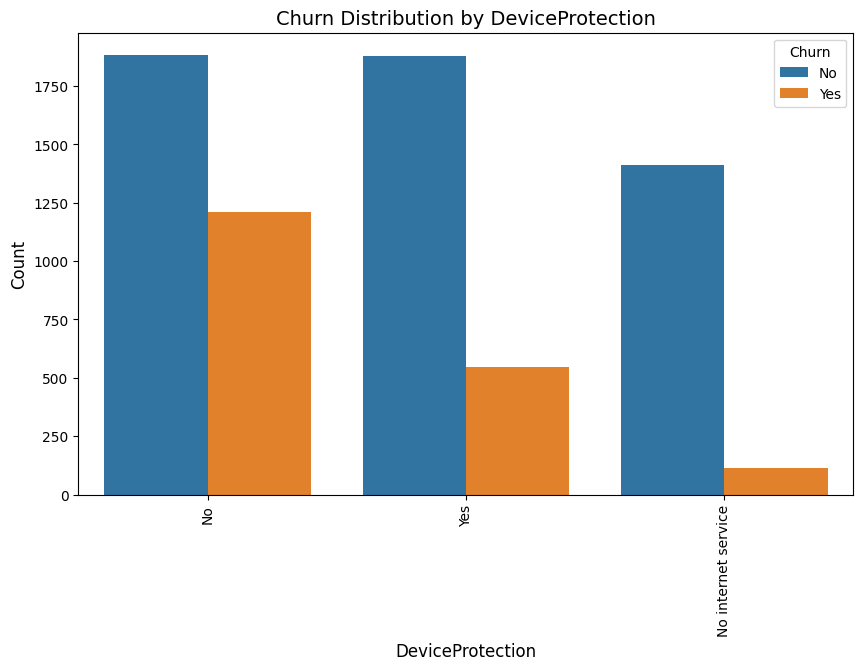

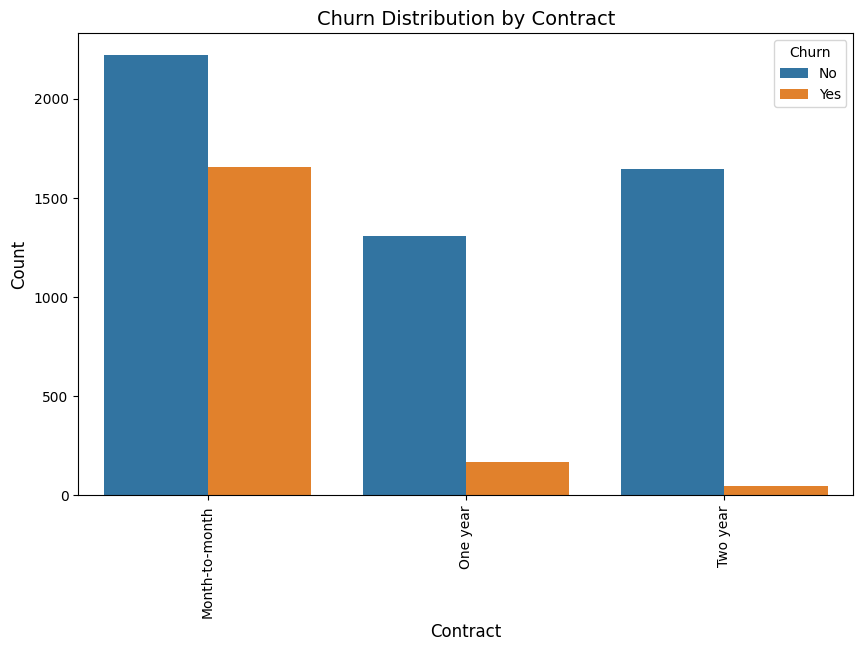

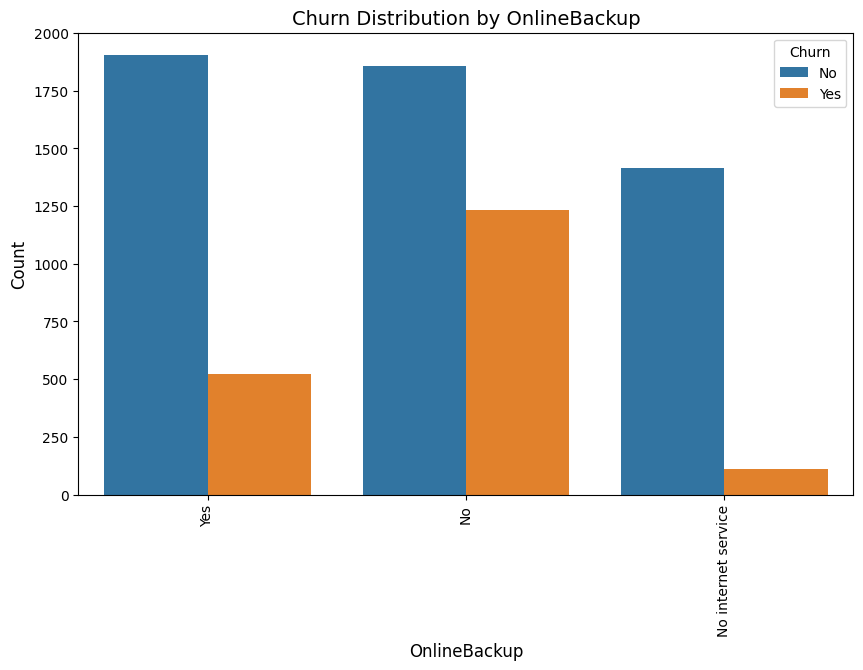

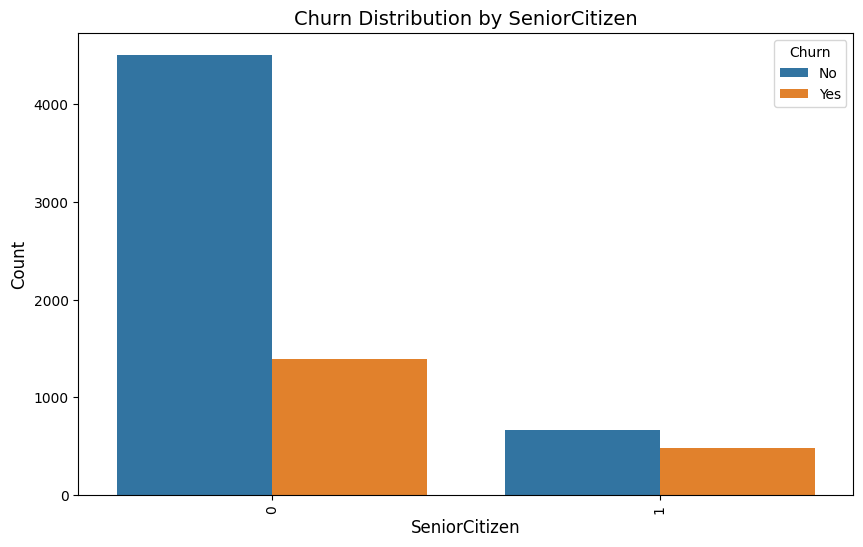

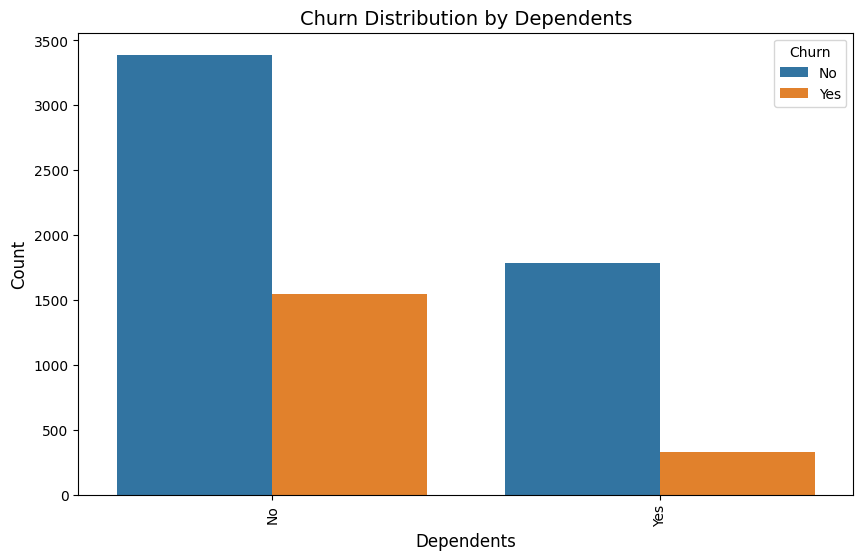

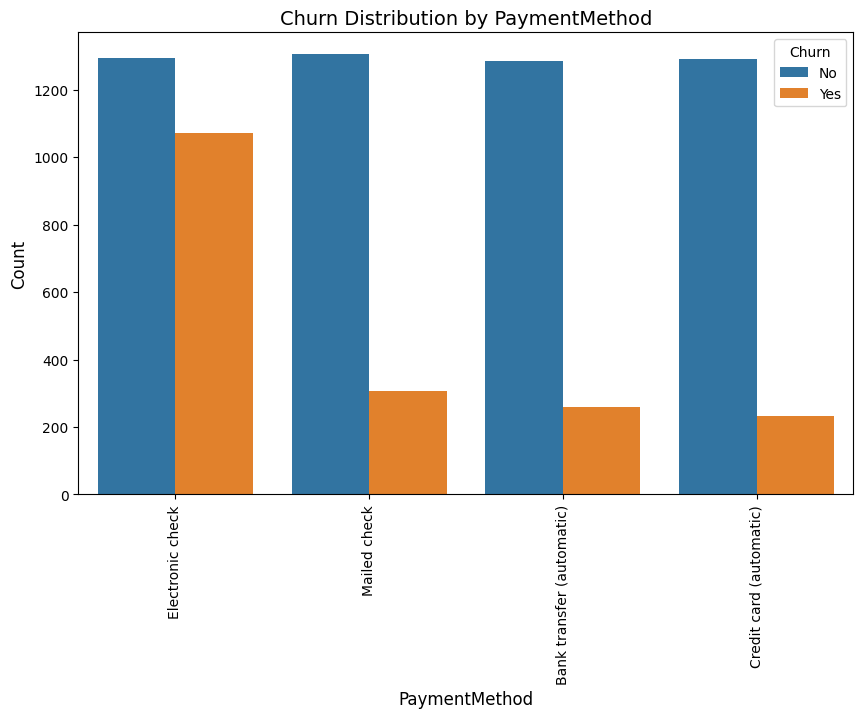

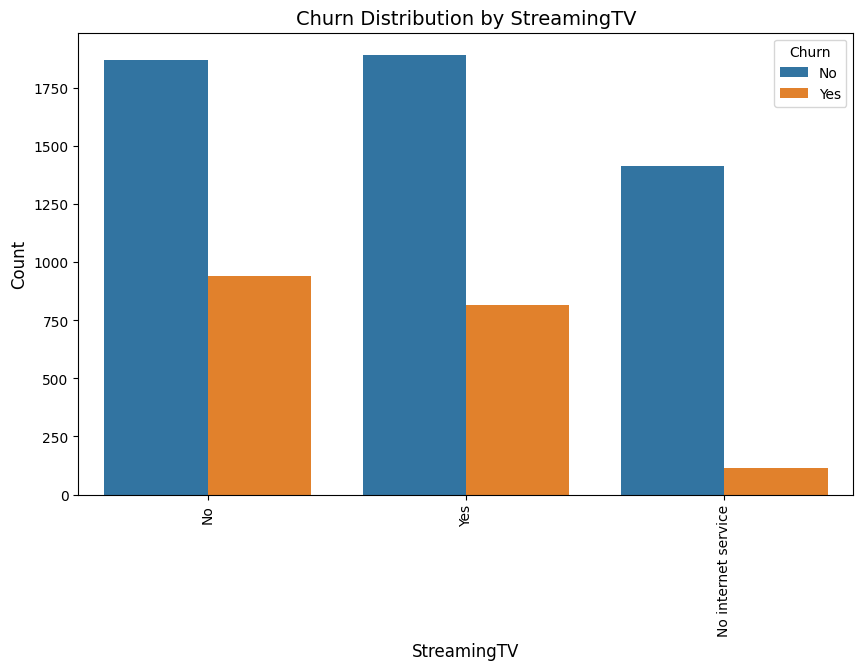

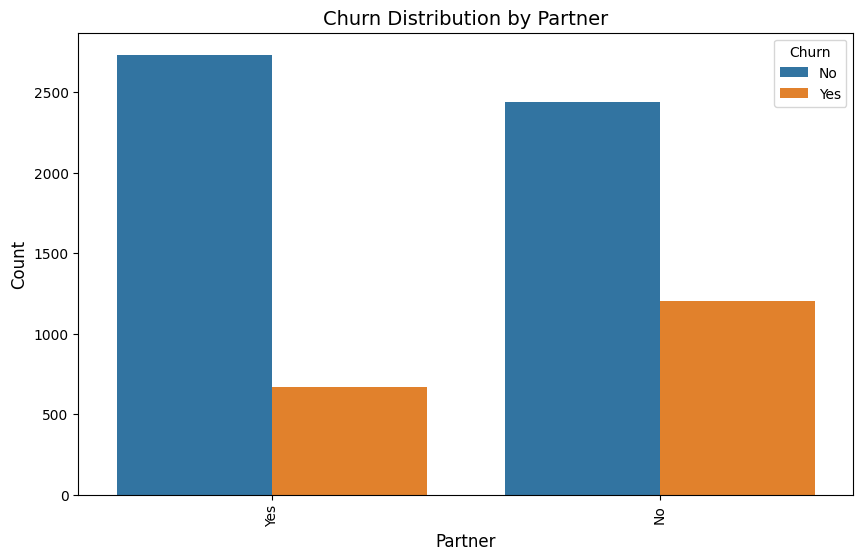

time: 5.74 s (started: 2024-10-01 08:19:51 +00:00)


In [ ]:
excluded_features = ["customerID"]

# Grouped bar plots to compare categorical features against Churn (excluding customerID)
for feature in categorical_features:
    if feature in df.columns and feature not in excluded_features:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=feature, hue='Churn')
        plt.title(f'Churn Distribution by {feature}', fontsize=14)
        plt.xlabel(feature, fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=90, fontsize=10)
        plt.show()

In [ ]:
for feature in categorical_features:
    if feature in df.columns:
        print(f"\nFeature: {feature}")
        print(df[feature].value_counts())


Feature: gender
gender
Male      3555
Female    3488
Name: count, dtype: int64

Feature: customerID
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64

Feature: OnlineSecurity
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

Feature: StreamingMovies
StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

Feature: PhoneService
PhoneService
Yes    6361
No      682
Name: count, dtype: int64

Feature: InternetService
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

Feature: PaperlessBilling
PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64

Feature: TechSupport
TechSupport
No                     3473


In [ ]:
df.shape

(7043, 21)

time: 7.59 ms (started: 2024-10-01 08:19:56 +00:00)


# **Data Preprocessing and feature engineering:**

Looking at the df.head(), df.info() the column TotalCharges	looks like a numerical column but its Dtype is object so it needs further inspection. Also there are 21 columns so the columns which are not visible after using df.head() we need to check them further if they are actually objects and dont need to be changed into a different Dtype. In this case only one column i.e., OnlineBackup is not visible.

In [ ]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

time: 10.2 ms (started: 2024-10-01 08:19:56 +00:00)


In [ ]:
# Replace ',' and ' ' with '.'
df['TotalCharges'] = df['TotalCharges'].astype(str).str.replace(',', '.', regex=False).str.replace(' ', '', regex=False)

# Convert to numeric, coercing errors (invalid entries become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

time: 16.3 ms (started: 2024-10-01 08:19:57 +00:00)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df['OnlineBackup'].unique() # Just checking because this column is not visible in df.info()

array(['Yes', 'No', 'No internet service'], dtype=object)

time: 6.53 ms (started: 2024-10-01 08:19:57 +00:00)


In [ ]:
import pandas as pd
import numpy as np

def check_special_values(df):
    # Initialize counts for NaN, inf, -inf, and zero
    nan_count = 0
    inf_count = 0
    neg_inf_count = 0
    zero_count = 0

    # DataFrames to store rows with special values
    rows_with_nan = pd.DataFrame()
    rows_with_inf = pd.DataFrame()
    rows_with_neg_inf = pd.DataFrame()
    rows_with_zero = pd.DataFrame()

    # Select only numeric columns for special value checks
    numeric_df = df.select_dtypes(include=np.number)

    # Loop through each row of the DataFrame
    for index, row in numeric_df.iterrows(): # Iterate over numeric DataFrame
        if row.isna().any():
            nan_count += 1
            rows_with_nan = pd.concat([rows_with_nan, df.loc[[index]]]) # Append from original df

        if np.isinf(row).any():
            if (row == np.inf).any():
                inf_count += 1
                rows_with_inf = pd.concat([rows_with_inf, df.loc[[index]]]) # Append from original df
            if (row == -np.inf).any():
                neg_inf_count += 1
                rows_with_neg_inf = pd.concat([rows_with_neg_inf, df.loc[[index]]]) # Append from original df

        if (row == 0).any():
            zero_count += 1
            rows_with_zero = pd.concat([rows_with_zero, df.loc[[index]]]) # Append from original df

    # Summary of counts
    print(f"NaN count: {nan_count}")
    print(f"inf count: {inf_count}")
    print(f"-inf count: {neg_inf_count}")
    print(f"Zero value count: {zero_count}")

    # Return rows containing special values
    return {
        "rows_with_nan": rows_with_nan,
        "rows_with_inf": rows_with_inf,
        "rows_with_neg_inf": rows_with_neg_inf,
        "rows_with_zero": rows_with_zero
    }

result = check_special_values(df)
print(result)

NaN count: 11
inf count: 0
-inf count: 0
Zero value count: 5901
{'rows_with_nan':       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...

In [ ]:
rows_with_nan = result["rows_with_nan"]
print(rows_with_nan)

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ... 

In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


time: 10.8 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
import pandas as pd

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['TotalCharges'].quantile(0.25)
Q3 = df['TotalCharges'].quantile(0.75)

# Step 2: Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step 3: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out the outliers (without changing the original column)
filtered_total_charges = df['TotalCharges'][(df['TotalCharges'] >= lower_bound) & (df['TotalCharges'] <= upper_bound)]

# Step 5: Calculate the mean of the filtered values
mean_filtered_total_charges = filtered_total_charges.mean()

# Print the results
print(f"Mean of 'TotalCharges' after removing outliers: {mean_filtered_total_charges}")

Mean of 'TotalCharges' after removing outliers: 2283.300440841866
time: 9.17 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
# Replace NaN values in 'TotalCharges' with the calculated mean
df['TotalCharges'].fillna(mean_filtered_total_charges, inplace=True)

# Verify the replacement
print(df['TotalCharges'].isna().sum())  # This should return 0 if all NaN values are replaced

0
time: 2.51 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
y=df['Churn']

time: 482 µs (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
X = df.drop(columns=['customerID', 'Churn'])

time: 3.27 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

time: 7.37 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'gender' column in the training data
X_train['gender_encoded'] = le.fit_transform(X_train['gender'])

# Transform the 'gender' column in the testing data
X_test['gender_encoded'] = le.transform(X_test['gender'])

time: 4.7 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Partner' column in the training data
X_train['Partner_encoded'] = le.fit_transform(X_train['Partner'])

# Transform the 'Partner' column in the testing data
X_test['Partner_encoded'] = le.transform(X_test['Partner'])

time: 3.6 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Dependents' column in the training data
X_train['Dependents_encoded'] = le.fit_transform(X_train['Dependents'])

# Transform the 'Dependents' column in the testing data
X_test['Dependents_encoded'] = le.transform(X_test['Dependents'])

time: 3.61 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Calculate the median of the 'tenure' column in X_train
median_tenure = X_train['tenure'].median()

# Create a new column 'tenure_mode' in X_train
X_train['tenure_mode'] = (X_train['tenure'] > median_tenure).astype(int)

# Standardize the 'tenure' column in X_train
scaler = StandardScaler()
X_train['tenure_scaled'] = scaler.fit_transform(X_train[['tenure']])

# Repeat for X_test using the median from X_train
X_test['tenure_mode'] = (X_test['tenure'] > median_tenure).astype(int)
X_test['tenure_scaled'] = scaler.transform(X_test[['tenure']])
#  Include both tenure_scaled and tenure_mode in model and drop tenure

time: 21.6 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'PhoneService' column in the training data
X_train['PhoneService_encoded'] = le.fit_transform(X_train['PhoneService'])

# Transform the 'PhoneService' column in the testing data
X_test['PhoneService_encoded'] = le.transform(X_test['PhoneService'])

time: 3.46 ms (started: 2024-10-01 08:20:07 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'MultipleLines'
X_train = pd.get_dummies(X_train, columns=['MultipleLines'], prefix='MultipleLines')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')
time: 10.7 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['MultipleLines'], prefix='MultipleLines')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes'],
      dtype='object')
time: 5.73 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'InternetService'
X_train = pd.get_dummies(X_train, columns=['InternetService'], prefix='InternetService')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'gender_encoded', 'Partner_encoded', 'Dependents_encoded',
       'tenure_mode', 'tenure_scaled', 'PhoneService_encoded',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')
time: 6.98 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['InternetService'], prefix='InternetService')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'gender_encoded', 'Partner_encoded', 'Dependents_encoded',
       'tenure_mode', 'tenure_scaled', 'PhoneService_encoded',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No'],
      dtype='object')
time: 12.8 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'OnlineSecurity'
X_train = pd.get_dummies(X_train, columns=['OnlineSecurity'], prefix='OnlineSecurity')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_encoded',
       'Partner_encoded', 'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes'],
      dtype='object')
time: 8.54 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['OnlineSecurity'], prefix='OnlineSecurity')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_encoded',
       'Partner_encoded', 'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes'],
      dtype='object')
time: 8.21 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'OnlineBackup'
X_train = pd.get_dummies(X_train, columns=['OnlineBackup'], prefix='OnlineBackup')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'],
      dtype='object')
time: 12.4 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['OnlineBackup'], prefix='OnlineBackup')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes'],
      dtype='object')
time: 8.76 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'DeviceProtection'
X_train = pd.get_dummies(X_train, columns=['DeviceProtection'], prefix='DeviceProtection')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes'],
      dtype='object')
time: 9.85 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['DeviceProtection'], prefix='DeviceProtection')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes'],
      dtype='object')
time: 7.51 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'TechSupport'
X_train = pd.get_dummies(X_train, columns=['TechSupport'], prefix='TechSupport')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'gender_encoded', 'Partner_encoded', 'Dependents_encoded',
       'tenure_mode', 'tenure_scaled', 'PhoneService_encoded',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')
time: 6.19 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['TechSupport'], prefix='TechSupport')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'gender_encoded', 'Partner_encoded', 'Dependents_encoded',
       'tenure_mode', 'tenure_scaled', 'PhoneService_encoded',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes'],
      dtype='object')
time: 9.05 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# Perform one-hot encoding on 'StreamingTV'
X_train = pd.get_dummies(X_train, columns=['StreamingTV'], prefix='StreamingTV')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_encoded',
       'Partner_encoded', 'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes'],
      dtype='object')
time: 9.18 ms (started: 2024-10-01 08:20:08 +0

In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['StreamingTV'], prefix='StreamingTV')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender_encoded',
       'Partner_encoded', 'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes'],
      dtype='object')
time: 7.51 ms (started: 2024-10-01 08:20:08 +0

In [ ]:
import pandas as pd

# Perform one-hot encoding on 'StreamingTV'
X_train = pd.get_dummies(X_train, columns=['StreamingMovies'], prefix='StreamingMovies')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMov

In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['StreamingMovies'], prefix='StreamingMovies')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMov

In [ ]:
import pandas as pd

# Perform one-hot encoding on 'Contract'
X_train = pd.get_dummies(X_train, columns=['Contract'], prefix='Contract')

# Print the column names after one-hot encoding
print(X_train.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'C

In [ ]:
# Ensure consistent encoding with the training data
X_test = pd.get_dummies(X_test, columns=['Contract'], prefix='ContractContract')

# Align columns between training and testing sets in case of unseen categories
X_test = X_test.reindex(columns = X_train.columns, fill_value=0)

# Print the column names after one-hot encoding
print(X_test.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'gender_encoded', 'Partner_encoded',
       'Dependents_encoded', 'tenure_mode', 'tenure_scaled',
       'PhoneService_encoded', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'C

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'gender' column in the training data
X_train['PaperlessBilling_encoded'] = le.fit_transform(X_train['PaperlessBilling'])

# Transform the 'gender' column in the testing data
X_test['PaperlessBilling_encoded'] = le.transform(X_test['PaperlessBilling'])

time: 5.09 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import pandas as pd

# One-hot encode the `PaymentMethod` column in X_train
X_train = pd.get_dummies(X_train, columns=['PaymentMethod'], prefix='PaymentMethod')

# One-hot encode the `PaymentMethod` column in X_test, ensuring alignment with X_train
X_test = pd.get_dummies(X_test, columns=['PaymentMethod'], prefix='PaymentMethod')
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

time: 9.97 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Calculate the median of the 'tenure' column in X_train
median_tenure = X_train['tenure'].median()

# Create two new columns 'tenure_mode_low' and 'tenure_mode_high' in X_train
X_train['tenure_mode_low'] = (X_train['tenure'] <= median_tenure).astype(int)
X_train['tenure_mode_high'] = (X_train['tenure'] > median_tenure).astype(int)

# Standardize the 'tenure' column in X_train
scaler = StandardScaler()
X_train['tenure_scaled'] = scaler.fit_transform(X_train[['tenure']])

# Repeat for X_test using the median from X_train
X_test['tenure_mode_low'] = (X_test['tenure'] <= median_tenure).astype(int)
X_test['tenure_mode_high'] = (X_test['tenure'] > median_tenure).astype(int)
X_test['tenure_scaled'] = scaler.transform(X_test[['tenure']])
# Include all three features

time: 14.9 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Apply log transformation (adding 1 to avoid log(0))
X_train['TotalCharges_log'] = np.log1p(X_train['TotalCharges'])
X_test['TotalCharges_log'] = np.log1p(X_test['TotalCharges'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the log-transformed column in X_train
X_train['TotalCharges_log_scaled'] = scaler.fit_transform(X_train[['TotalCharges_log']])

# Transform the log-transformed column in X_test
X_test['TotalCharges_log_scaled'] = scaler.transform(X_test[['TotalCharges_log']])

time: 10.1 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
X_train.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges','TotalCharges_log'],inplace=True)

time: 3.78 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
X_test.drop(columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges','TotalCharges_log'],inplace=True)

time: 2.26 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
y_train = y_train.to_frame()
print(y_train.columns)

Index(['Churn'], dtype='object')
time: 2.23 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
y_test = y_test.to_frame()
print(y_train.columns)

Index(['Churn'], dtype='object')
time: 1.02 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the 'Churn' column in the training data
y_train['Churn_encoded'] = le.fit_transform(y_train['Churn'])

# Transform the 'Churn' column in the testing data
y_test['Churn_encoded'] = le.transform(y_test['Churn'])

time: 6.68 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
y_train.drop(columns=['Churn'],inplace=True)

time: 1.83 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
y_test.drop(columns=['Churn'],inplace=True)

time: 1.66 ms (started: 2024-10-01 08:20:08 +00:00)


# <u>Logistic Regression:</u>

In [ ]:
clf = LogisticRegression(fit_intercept=True, max_iter=10000,class_weight='balanced')
clf.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000)

time: 42.9 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Get the model coefficients
clf.coef_

array([[-0.06367842,  0.10325956, -0.23774479, -0.02718807, -0.17534117,
        -0.11090648, -0.28564808, -0.16997608,  0.1747416 , -0.54569179,
         0.55095083, -0.2861416 ,  0.1265256 , -0.2861416 , -0.12126656,
         0.08860496, -0.2861416 , -0.08334592, -0.03380237, -0.2861416 ,
         0.03906141,  0.10565369, -0.2861416 , -0.10039465, -0.23325723,
        -0.2861416 ,  0.23851627, -0.16223393, -0.2861416 ,  0.16749298,
         0.72201633, -0.08371588, -0.91918301,  0.37409015, -0.11585351,
        -0.19495821,  0.23120245, -0.20127329, -0.25369449, -0.02718807,
        -0.9197158 ]])

time: 4.69 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
clf.intercept_

array([-0.29739849])

time: 6.73 ms (started: 2024-10-01 08:20:08 +00:00)


<h1><u>Evaluating the performance of the trained model:</u></h1>

In [ ]:
# Get the predicted probabilities
train_preds = clf.predict_proba(X_train)
test_preds = clf.predict_proba(X_test)

time: 14.2 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
test_preds

array([[0.72717533, 0.27282467],
       [0.69368117, 0.30631883],
       [0.5587894 , 0.4412106 ],
       ...,
       [0.49888225, 0.50111775],
       [0.81937691, 0.18062309],
       [0.36061078, 0.63938922]])

time: 3.91 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
train_preds = clf.predict_proba(X_train)[:,1]
test_preds = clf.predict_proba(X_test)[:,1]

time: 15.3 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
test_preds

array([0.27282467, 0.30631883, 0.4412106 , ..., 0.50111775, 0.18062309,
       0.63938922])

time: 8.33 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

time: 18.2 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Set NumPy print options to display all values
np.set_printoptions(threshold=np.inf)  # or threshold=sys.maxsize

# Now print the array
print(test_class_preds)

[0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 1 0 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0
 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 

<h1> In this problem we will focus on minimizing false negatives (customers predicted to stay but actually churned).</h1>

In [ ]:
# Get the accuracy scores
train_accuracy = accuracy_score(train_class_preds,y_train)
test_accuracy = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.7596734114306
The accuracy on test data is  0.7842441447835344
time: 18.6 ms (started: 2024-10-01 08:20:08 +00:00)


[[3052 1081]
 [ 273 1228]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

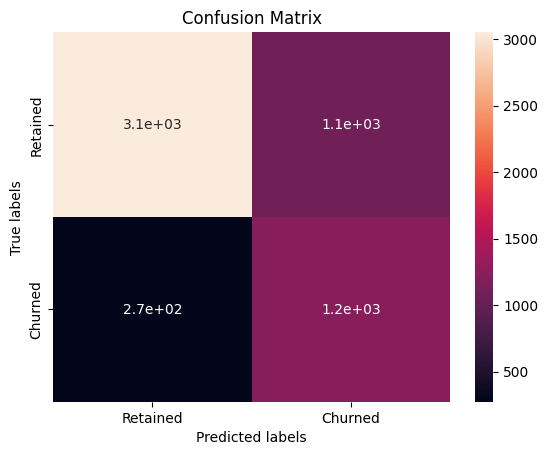

time: 405 ms (started: 2024-10-01 08:20:08 +00:00)


In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[[878 163]
 [141 227]]


[Text(0, 0.5, 'Retained'), Text(0, 1.5, 'Churned')]

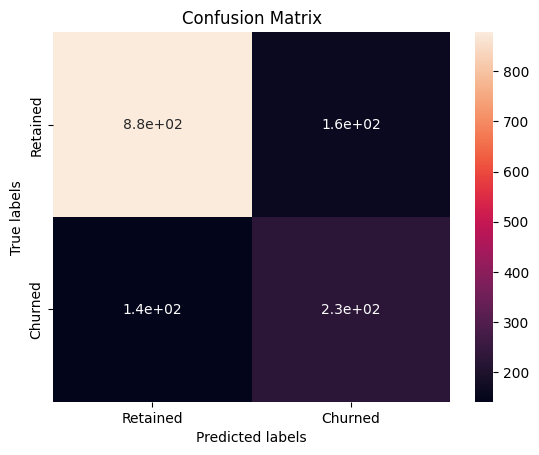

time: 391 ms (started: 2024-10-01 08:20:09 +00:00)


In [ ]:
# Get the confusion matrix for both train and test

labels = ['Retained', 'Churned']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
logistic = LogisticRegression()

time: 624 µs (started: 2024-10-01 08:20:09 +00:00)


In [ ]:
scoring = ['accuracy']
scores = cross_validate(logistic,X_train, y_train, scoring = scoring, cv = 5, return_train_score=True,return_estimator=True,verbose = 10)

[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.811, test=0.815) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.811, test=0.807) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


[CV] END ................ accuracy: (train=0.809, test=0.812) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.815, test=0.798) total time=   0.1s
[CV] START .....................................................................
[CV] END ................ accuracy: (train=0.810, test=0.816) total time=   0.1s
time: 437 ms (started: 2024-10-01 08:20:09 +00:00)


[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.4s


In [ ]:
scores['train_accuracy']

array([0.81073885, 0.81073885, 0.80918571, 0.81495452, 0.80967169])

time: 7.45 ms (started: 2024-10-01 08:20:10 +00:00)


In [ ]:
scores['test_accuracy']

array([0.81543922, 0.8065661 , 0.81188997, 0.79769299, 0.81616341])

time: 4.3 ms (started: 2024-10-01 08:20:10 +00:00)


In [ ]:
scores['estimator']

[LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression(),
 LogisticRegression()]

time: 9.29 ms (started: 2024-10-01 08:20:10 +00:00)


In [ ]:
for model in scores['estimator']:
    print(model.coef_)

[[-0.06175698  0.05578147 -0.19269746 -0.16100243 -0.05607743 -0.17428956
  -0.35563818 -0.28270245  0.18134862 -0.62893872  0.50399663 -0.33204992
   0.06342936 -0.33204992 -0.18837145  0.04088436 -0.33204992 -0.16582645
  -0.10474753 -0.33204992 -0.02019456  0.03033329 -0.33204992 -0.15527538
  -0.2738424  -0.33204992  0.14890031 -0.20092499 -0.33204992  0.0759829
   0.76915015 -0.1273722  -1.09876996  0.3075967  -0.10929093 -0.23094453
   0.12394525 -0.2407018  -0.29598959 -0.16100243 -0.88738317]]
[[-0.15630822  0.10063727 -0.2514533  -0.16497905 -0.03208977 -0.21882472
  -0.33368273 -0.2257675   0.11485801 -0.65497145  0.54126935 -0.33089012
   0.03754771 -0.33089012 -0.15124981  0.06366092 -0.33089012 -0.17736303
  -0.08511248 -0.33089012 -0.02858962  0.02722692 -0.33089012 -0.14092902
  -0.24924511 -0.33089012  0.13554301 -0.21209291 -0.33089012  0.09839081
   0.65764415 -0.15917359 -0.94306277  0.40059847 -0.19029112 -0.3171084
   0.21393673 -0.15112944 -0.27961317 -0.16497905 

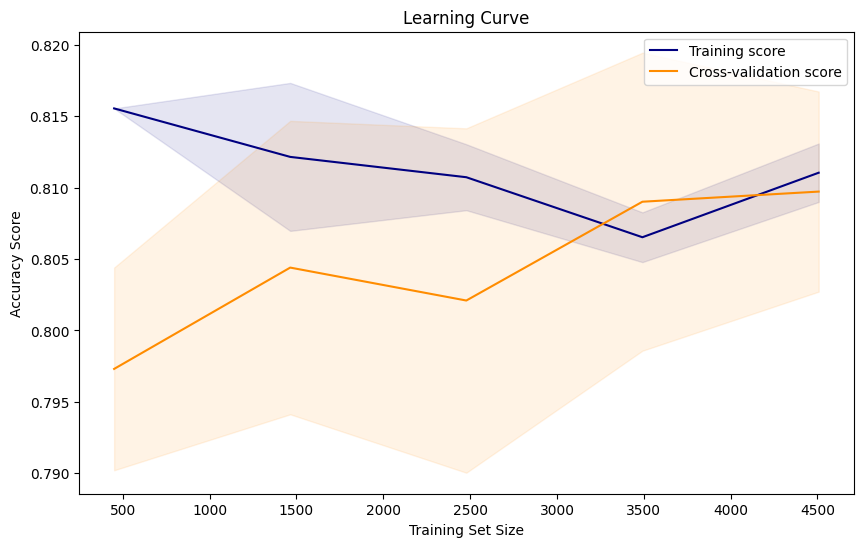

time: 1.63 s (started: 2024-10-01 08:20:10 +00:00)


In [ ]:
from sklearn.model_selection import learning_curve
# Assuming you have your model (model) and data (X_train, y_train)
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="navy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="navy")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="darkorange")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="darkorange")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

There is a mild overfitting so lets apply some regularization.

# **L2 regularization with logistic regression:**

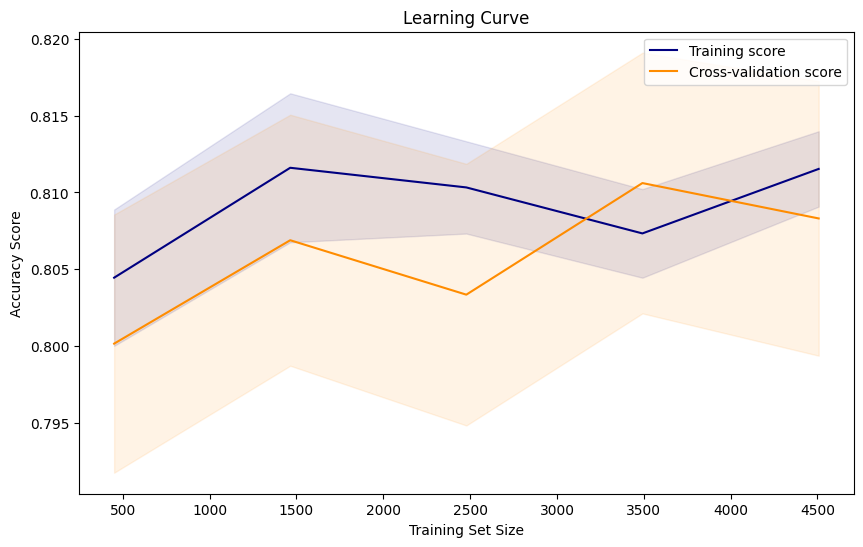

[CV] START .....................................................................
[CV] END  accuracy: (train=0.811, test=0.816) f1: (train=0.607, test=0.624) precision: (train=0.680, test=0.685) recall: (train=0.548, test=0.573) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.2s


[CV] END  accuracy: (train=0.812, test=0.803) f1: (train=0.605, test=0.575) precision: (train=0.685, test=0.676) recall: (train=0.542, test=0.500) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.809, test=0.813) f1: (train=0.603, test=0.618) precision: (train=0.675, test=0.676) recall: (train=0.545, test=0.570) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.816, test=0.793) f1: (train=0.617, test=0.564) precision: (train=0.692, test=0.645) recall: (train=0.557, test=0.502) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.810, test=0.816) f1: (train=0.598, test=0.620) precision: (train=0.686, test=0.690) recall: (train=0.530, test=0.563) total time=   0.1s
Train accuracy for each fold: [0.81096073 0.81162636 0.80874196 0.8160639  0.81011535]
Test a

[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.9s


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, and y_test

# Hyperparameter Grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# L2 Regularized Logistic Regression with GridSearchCV
model = LogisticRegression(penalty='l2', solver='liblinear')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best C value
best_C = grid_search.best_params_['C']

# Create a logistic regression model with the best C value
best_model = LogisticRegression(penalty='l2', C=best_C, solver='liblinear')

# --- Learning Curve ---

# Generate the learning curve data with the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="navy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="navy")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="darkorange")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="darkorange")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

# --- Cross-validation and Coefficient Analysis ---

# Perform cross-validation with the best model, including scoring for precision, recall, and F1-score
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
scores = cross_validate(best_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, return_estimator=True, verbose=10)

# Extract train and test scores for each fold and each metric
train_accuracy = scores['train_accuracy']
test_accuracy = scores['test_accuracy']
train_precision = scores['train_precision']
test_precision = scores['test_precision']
train_recall = scores['train_recall']
test_recall = scores['test_recall']
train_f1 = scores['train_f1']
test_f1 = scores['test_f1']

# Print the scores
print("Train accuracy for each fold:", train_accuracy)
print("Test accuracy for each fold:", test_accuracy)
print("Train precision for each fold:", train_precision)
print("Test precision for each fold:", test_precision)
print("Train recall for each fold:", train_recall)
print("Test recall for each fold:", test_recall)
print("Train F1-score for each fold:", train_f1)
print("Test F1-score for each fold:", test_f1)

# Get model coefficients for each fold
coefs = np.array([model.coef_ for model in scores['estimator']])
print("Coefficients for each fold:\n", coefs)

# **L1 regularization with logistic regression:**

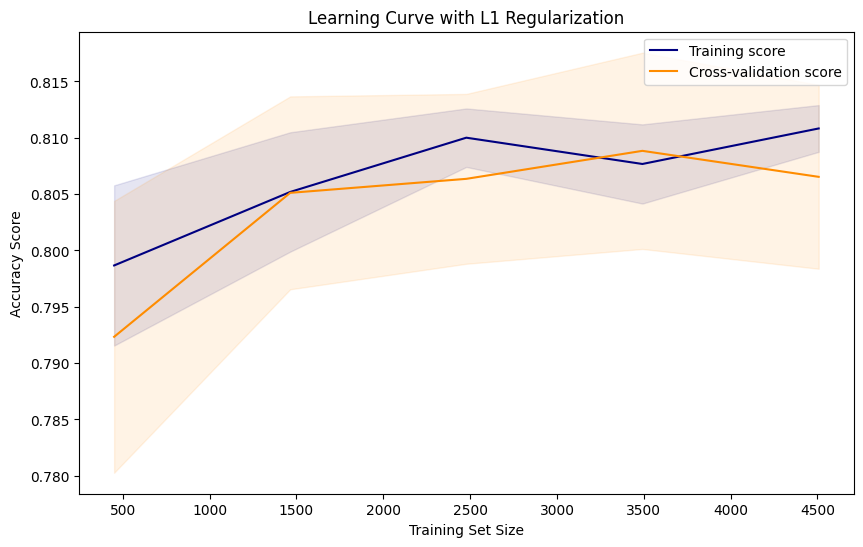

Accuracy: 0.7062
Precision: 0.4646
Recall: 0.8207
F1-score: 0.5933
[CV] START .....................................................................
[CV] END  accuracy: (train=0.809, test=0.813) f1: (train=0.597, test=0.611) precision: (train=0.682, test=0.683) recall: (train=0.530, test=0.553) total time=   0.1s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.1s


[CV] END  accuracy: (train=0.811, test=0.799) f1: (train=0.599, test=0.555) precision: (train=0.688, test=0.678) recall: (train=0.530, test=0.470) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.809, test=0.812) f1: (train=0.601, test=0.610) precision: (train=0.677, test=0.680) recall: (train=0.540, test=0.553) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.815, test=0.794) f1: (train=0.611, test=0.564) precision: (train=0.692, test=0.649) recall: (train=0.547, test=0.498) total time=   0.1s
[CV] START .....................................................................
[CV] END  accuracy: (train=0.811, test=0.813) f1: (train=0.594, test=0.611) precision: (train=0.692, test=0.688) recall: (train=0.520, test=0.550) total time=   0.1s
Train accuracy for each fold: [0.80896383 0.81073885 0.80874196 0.81451076 0.81055901]
Test a

[Parallel(n_jobs=1)]: Done   4 tasks      | elapsed:    0.5s


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, learning_curve, StratifiedShuffleSplit, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have X_train, y_train, X_test, and y_test

# Hyperparameter Grid - Reduced C values for stronger regularization
param_grid = {'C': [0.01, 0.1, 1, 10]}  # Removed very small and very large C values

# L1 Regularized Logistic Regression with StratifiedShuffleSplit
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000, random_state=42)  # Increased max_iter
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Get the best C value
best_C = grid_search.best_params_['C']

# --- Learning Curve ---

# Create a logistic regression model with the best C value
best_model = LogisticRegression(penalty='l1', C=best_C, solver='liblinear', max_iter=10000, random_state=42)  # Increased max_iter

# Generate the learning curve data with the best model
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(.1, 1.0, 5), n_jobs=-1
)

# Calculate mean and standard deviation for training and testing scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="navy")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="navy")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="darkorange")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="darkorange")
plt.title("Learning Curve with L1 Regularization")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.show()

# --- Evaluation on Test Set ---

# Train the model with the best hyperparameter (C=best_C) on the entire training set
clf = LogisticRegression(C=best_C, penalty='l1', solver='liblinear', fit_intercept=True, max_iter=10000, class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the held-out test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# --- Cross-validation and Coefficient Analysis ---

# Perform cross-validation with the best model, including scoring for precision, recall, and F1-score
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}
scores = cross_validate(best_model, X_train, y_train, scoring=scoring, cv=5, return_train_score=True, return_estimator=True, verbose=10)

# Extract train and test scores for each fold and each metric
train_accuracy = scores['train_accuracy']
test_accuracy = scores['test_accuracy']
train_precision = scores['train_precision']
test_precision = scores['test_precision']
train_recall = scores['train_recall']
test_recall = scores['test_recall']
train_f1 = scores['train_f1']
test_f1 = scores['test_f1']

# Print the scores
print("Train accuracy for each fold:", train_accuracy)
print("Test accuracy for each fold:", test_accuracy)
print("Train precision for each fold:", train_precision)
print("Test precision for each fold:", test_precision)
print("Train recall for each fold:", train_recall)
print("Test recall for each fold:", test_recall)
print("Train F1-score for each fold:", train_f1)
print("Test F1-score for each fold:", test_f1)

# Get model coefficients for each fold
coefs = np.array([model.coef_ for model in scores['estimator']])
print("Coefficients for each fold:\n", coefs)

# **CONCLUSION**

Conclusion:

The Logistic Regression model with L1 regularization provides reasonable performance with an emphasis on high recall but low precision. The model is well-regularized and does not overfit. However, there is room to improve precision and balance the overall trade-off between false positives and true positives.



1. Model Performance Evaluation:
   Recall (0.8207): The recall score is high, indicating the model is doing a good job at capturing most of the actual positives. This high recall but low precision suggests that the model tends to classify many instances as positive, leading to more false positives but capturing more true positives.

2. Cross-validation Results:
   The L1 regularization has resulted in some feature coefficients being set to zero (feature elimination). This means some features are considered irrelevant by the model, which simplifies the model and helps reduce overfitting.
   The learning curve shows that adding more data improves model performance, as the training and cross-validation scores converge. This suggests that the model benefits from more data and might further improve with a larger dataset.

4. Bias-Variance Tradeoff:
   Bias: The gap between the training score (higher) and the cross-validation score (lower) is small, indicating that the model has a slight variance but not excessively. This means that the model has been regularized well and is not overly complex.
   Variance: Since the model isn't overfitting, it seems that the variance is under control.
